In [72]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
# Cargar el dataframe limpio desde el archivo CSV
df = pd.read_csv('../data/csv_limpieza_datos.csv')

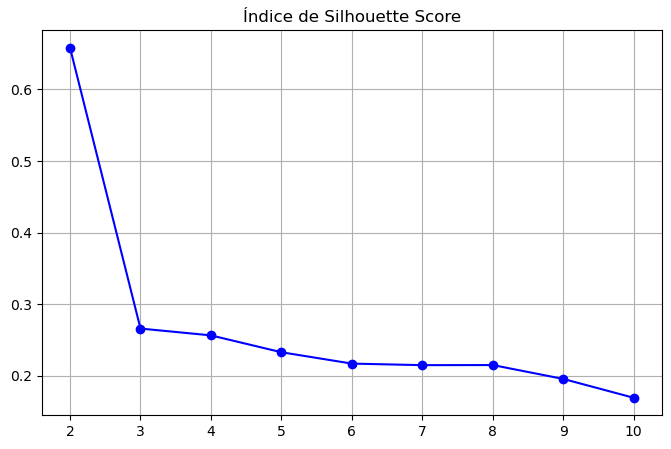

✅ El número óptimo de clusters según Silhouette es: 2


In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#Seleccionar las variables adecuadas para clustering
columns_for_clustering = [
    "heading_accuracy","acceleration",
    "ball_control", "fk_accuracy","dribbling", "short_passing", "long_passing",
    "finishing", "balance","jumping","shot_power", "long_shots","att._position" ,"vision",
    "composure", "aggression", "interceptions", "defensive_awareness",
    "gk_reflexes", "gk_positioning", "gk_diving","gk_handling","gk_kicking"
]



#Filtrar solo las columnas numéricas y asegurarse de que no haya valores categóricos
df_clustering = df[columns_for_clustering].copy()

#Aplicar estandarización
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_clustering)

#Calcular el coeficiente de Silhouette para distintos valores de clusters
range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled_array)
    silhouette_avg = silhouette_score(df_scaled_array, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

#Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='-', color='b')
plt.title("Índice de Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Mostrar el número óptimo de clusters
optimal_k = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"✅ El número óptimo de clusters según Silhouette es: {optimal_k}")


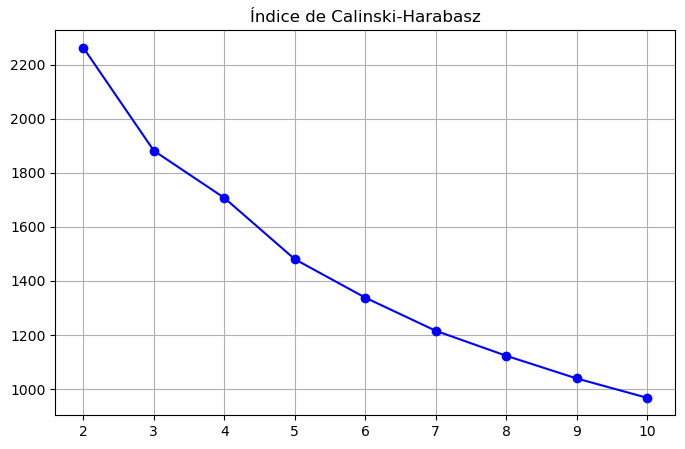

✅ El número óptimo de clusters según Calinski-Harabasz es: 2


In [74]:
from sklearn.metrics import calinski_harabasz_score

#Calcular el Índice de Calinski-Harabasz para distintos valores de clusters
range_n_clusters = list(range(2, 11))  # Probar de 2 a 10 clusters
calinski_harabasz_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled_array)
    ch_score = calinski_harabasz_score(df_scaled_array, cluster_labels)
    calinski_harabasz_scores.append(ch_score)

#Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, calinski_harabasz_scores, marker='o', linestyle='-', color='b')
plt.title("Índice de Calinski-Harabasz")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Mostrar el número óptimo de clusters
optimal_k_ch = range_n_clusters[np.argmax(calinski_harabasz_scores)]
print(f"✅ El número óptimo de clusters según Calinski-Harabasz es: {optimal_k_ch}")


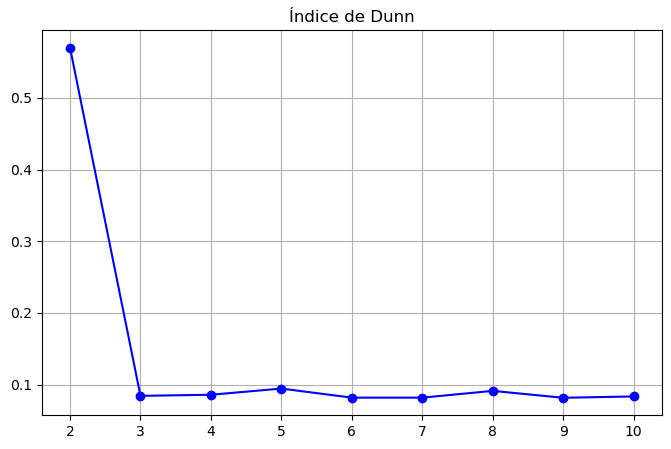

✅ El número óptimo de clusters según el Índice de Dunn es: 2


In [75]:
from sklearn.metrics import pairwise_distances

#Función para calcular el Índice de Dunn
def dunn_index(X, labels):
    """
    Calcula el Índice de Dunn para una partición de clustering.
    X: Datos
    labels: Etiquetas de los clusters asignados por K-Means
    """
    unique_clusters = np.unique(labels)
    cluster_distances = []
    cluster_diameters = []

    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                # Distancia mínima entre puntos de diferentes clusters
                min_intercluster_distance = np.min(
                    pairwise_distances(X[labels == i], X[labels == j])
                )
                cluster_distances.append(min_intercluster_distance)

        # Diámetro del cluster (máxima distancia dentro del mismo cluster)
        intra_distances = pairwise_distances(X[labels == i])
        cluster_diameter = np.max(intra_distances)
        cluster_diameters.append(cluster_diameter)

    return np.min(cluster_distances) / np.max(cluster_diameters)

#Calcular el Índice de Dunn para distintos valores de clusters
range_n_clusters = list(range(2, 11))  # Probar de 2 a 10 clusters
dunn_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_clustering.to_numpy()) 
    dunn_score = dunn_index(df_clustering.to_numpy(), cluster_labels)
    dunn_scores.append(dunn_score)

#Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, dunn_scores, marker='o', linestyle='-', color='b')
plt.title("Índice de Dunn")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Mostrar el número óptimo de clusters
optimal_k_dunn = range_n_clusters[np.argmax(dunn_scores)]
print(f"✅ El número óptimo de clusters según el Índice de Dunn es: {optimal_k_dunn}")


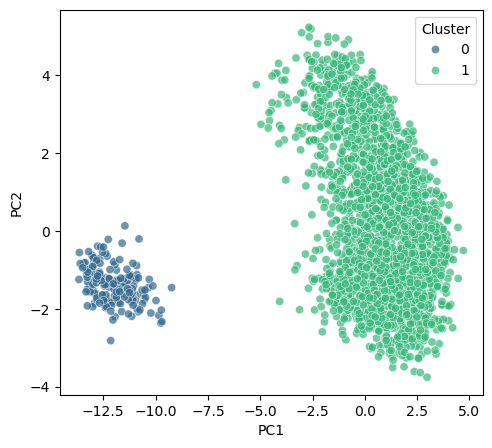

In [76]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df_scaled = pd.DataFrame(df_scaled_array, columns=df_clustering.columns, index=df_clustering.index)

#Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

#Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled_array)

#Obtener etiquetas de los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_K2'] = kmeans.labels_

#Graficar los clusters con K=2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster_K2"], palette="viridis", alpha=0.7)
plt.legend(title="Cluster")


In [77]:
# Número de jugadores por cluster
counts = df['Cluster'].value_counts()

# Porcentaje de jugadores por cluster
percentages = df['Cluster'].value_counts(normalize=True) * 100

# Crear un DataFrame que muestra ambas informaciones
cluster_summary = pd.DataFrame({
    'Número de jugadores': counts,
    'Porcentaje (%)': percentages.round(2)
})

print(cluster_summary)

         Número de jugadores  Porcentaje (%)
Cluster                                     
1                       2367           93.23
0                        172            6.77


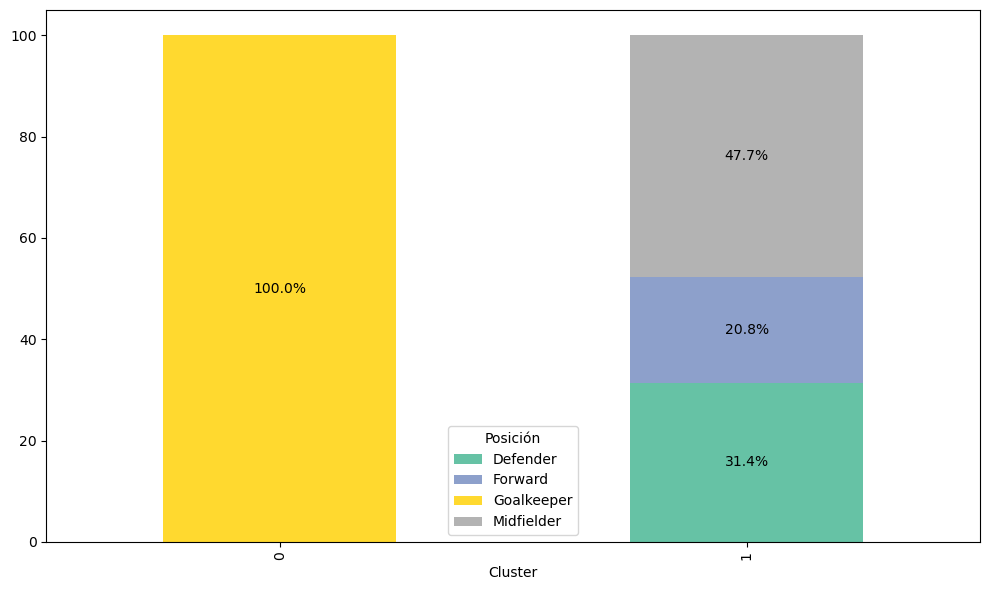

In [78]:
# Calcular proporciones de posiciones por cluster
position_cluster = pd.crosstab(df['core_position'], df['Cluster'], normalize='columns') * 100

# Transponer el DataFrame para que los clusters estén en el eje X
ax = position_cluster.T.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6))

# Añadir los porcentajes a cada segmento de barra
for container in ax.containers:
    labels = [f'{x:.1f}%' if x > 0.1 else '' for x in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Estética del gráfico
plt.legend(title='Posición')
plt.tight_layout()
plt.show()

In [79]:
df_goalkeepers = df[df['Cluster'] == 0]

In [80]:
jugadores_de_campo=df_goalkeepers[df_goalkeepers['core_position'] != 'Goalkeeper']
jugadores_de_campo['player_name']

Series([], Name: player_name, dtype: object)

In [81]:
# Filtrar solo los porteros
df_goalkeepers_only = df_goalkeepers[df_goalkeepers['core_position'] == 'Goalkeeper']

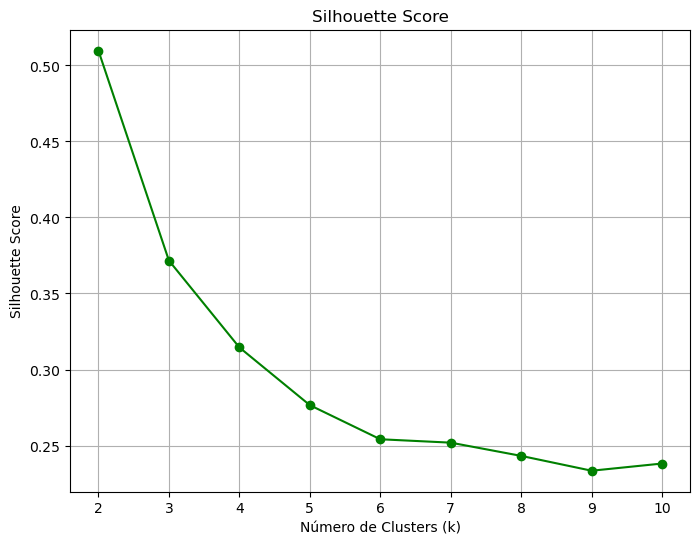

In [82]:
variables_porteros = df_goalkeepers_only[["gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes"]]
scaler1 = StandardScaler()
var1 = scaler1.fit_transform(variables_porteros)

# Definir el rango de k
k_range = range(2, 11)

silhouette_scores_new1 = []

# Calcular el Silhouette Score para cada k
for k in k_range:
    kmeans_new1 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_new1.fit(var1)
    silhouette_scores_new1.append(silhouette_score(var1, kmeans_new1.labels_))

# Identificar el número óptimo de clusters basado en el Silhouette Score
optimal_k_silhouette1 = k_range[silhouette_scores_new1.index(max(silhouette_scores_new1))]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores_new1, marker='o', linestyle='-', color='g')
plt.title("Silhouette Score")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

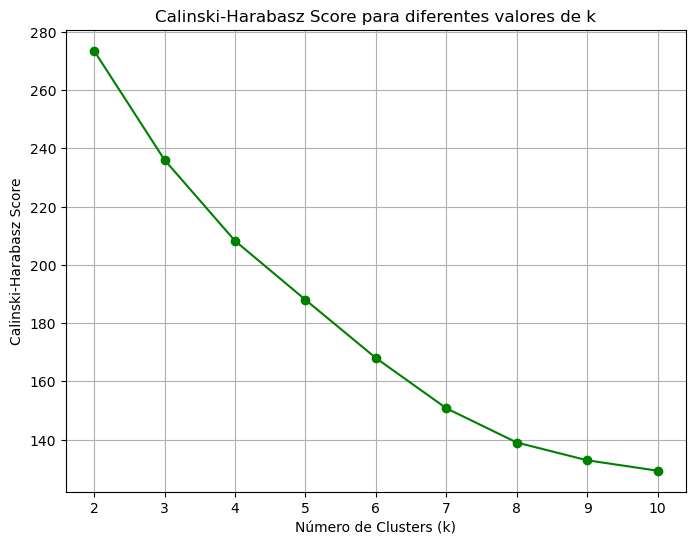

In [83]:
# Calcular el Calinski-Harabasz Score para cada k
calinski_scoress = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(var1)
    score = calinski_harabasz_score(var1, kmeans.labels_)
    calinski_scoress.append(score)

# Identificar el número óptimo de clusters basado en el Calinski-Harabasz Score
optimal_k_calinskii = k_range[calinski_scoress.index(max(calinski_scoress))]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(k_range, calinski_scoress, marker='o', linestyle='-', color='g')
plt.title("Calinski-Harabasz Score para diferentes valores de k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.grid(True)
plt.show()

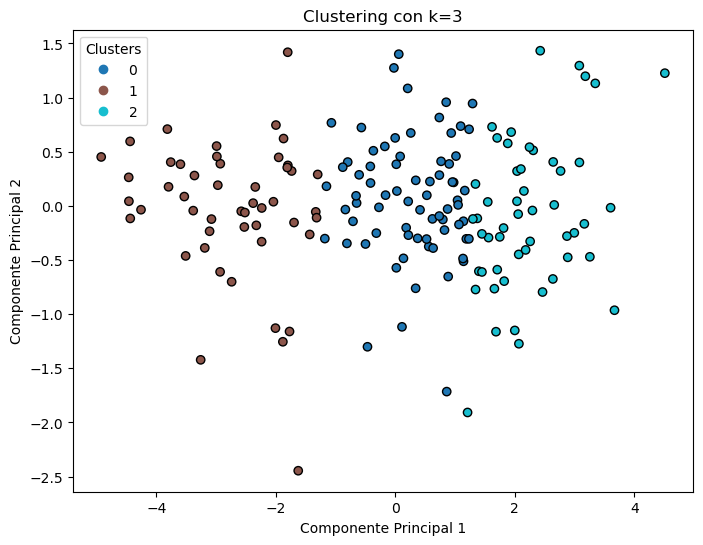

In [84]:
# Aplicar PCA para reducir a 2 dimensiones
pca1 = PCA(n_components=2)
pca_components1 = pca1.fit_transform(var1)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_goalkeepers_only['Cluster_k3'] = kmeans.fit_predict(pca_components1)

# Graficar las dos primeras componentes principales
plt.figure(figsize=(8, 6))

# Definir los colores del cluster
colormap = plt.get_cmap('tab10')
scatter = plt.scatter(pca_components1[:, 0], pca_components1[:, 1], c=df_goalkeepers_only['Cluster_k3'], cmap=colormap, edgecolors='k')

# Añadir título y etiquetas
plt.title("Clustering con k=3")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Mostrar la leyenda con 4 colores
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")  # Mostrar todos los clusters

plt.show()

In [85]:
# Contar el número de jugadores por cluster
cluster_counts = df_goalkeepers_only['Cluster_k3'].value_counts().sort_index()

# Calcular el porcentaje
cluster_percentages = df_goalkeepers_only['Cluster_k3'].value_counts(normalize=True).sort_index() * 100

# Crear un DataFrame resumen
cluster_summary = pd.DataFrame({
    'Número de jugadores': cluster_counts,
    'Porcentaje (%)': cluster_percentages.round(2)
})

# Mostrar la tabla
print(cluster_summary)


            Número de jugadores  Porcentaje (%)
Cluster_k3                                     
0                            72           41.86
1                            49           28.49
2                            51           29.65


In [86]:
# Seleccionar solo las columnas usadas para el clustering
variables_porteros = ['gk_reflexes', 'gk_positioning', 'gk_diving',
                      'gk_handling', 'gk_kicking']

# Calcular la media por cluster
cluster_means = df_goalkeepers_only.groupby('Cluster_k3')[variables_porteros].mean().round(2)

print(cluster_means)


            gk_reflexes  gk_positioning  gk_diving  gk_handling  gk_kicking
Cluster_k3                                                                 
0                 74.93           72.26      73.57        70.93       70.19
1                 65.20           62.06      64.02        61.55       60.61
2                 81.73           79.43      79.73        77.51       74.82


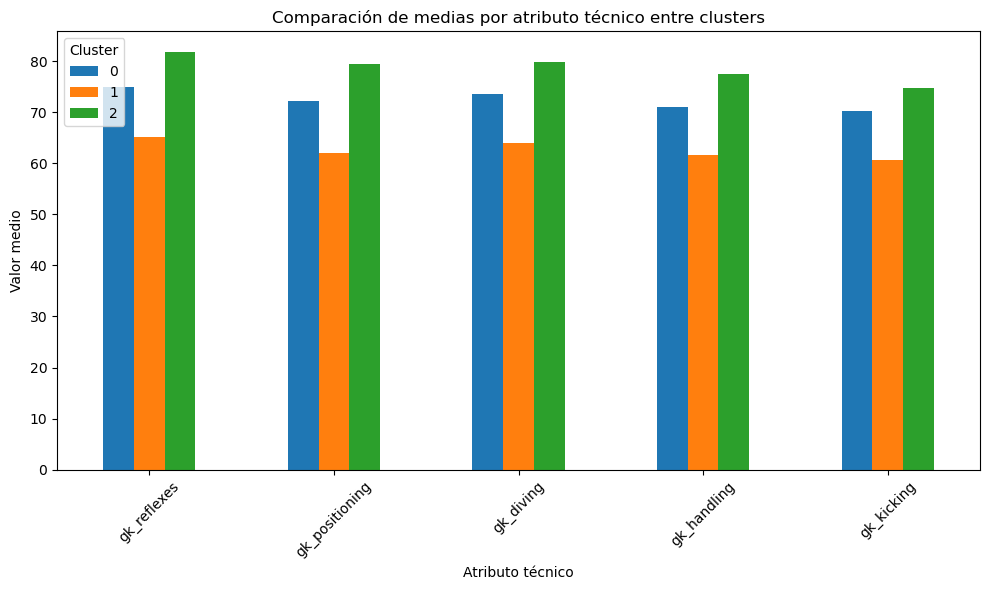

In [87]:
import matplotlib.pyplot as plt

cluster_means.T.plot(kind='bar', figsize=(10,6))
plt.title('Comparación de medias por atributo técnico entre clusters')
plt.ylabel('Valor medio')
plt.xlabel('Atributo técnico')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='upper left')
plt.tight_layout()
plt.show()


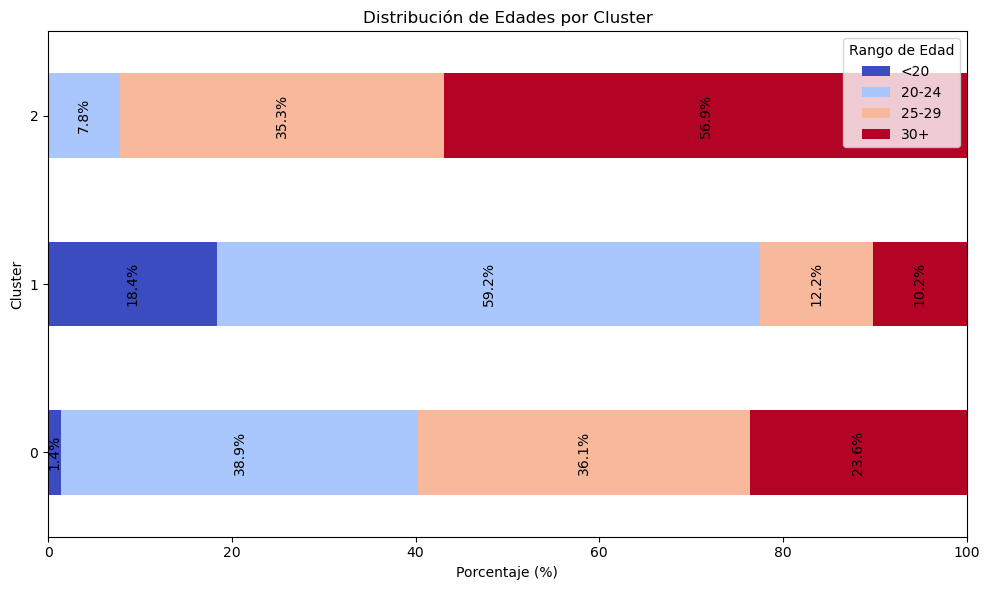

In [88]:
# Definir los rangos de edad
bins = [0, 19, 24, 29, float('inf')]
labels = ['<20', '20-24', '25-29', '30+']

# Crear la columna de rangos de edad
df_goalkeepers_only['age_group'] = pd.cut(df_goalkeepers_only['age'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster para obtener porcentajes
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], df_goalkeepers_only['age_group'], normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (con texto en vertical)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for age_group, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,  # x-position
                i,                            # y-position (barra actual)
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90                  # ← porcentaje en vertical
            )
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de Edades por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Edad')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Eliminar la columna auxiliar
df_goalkeepers_only.drop('age_group', axis=1, inplace=True)


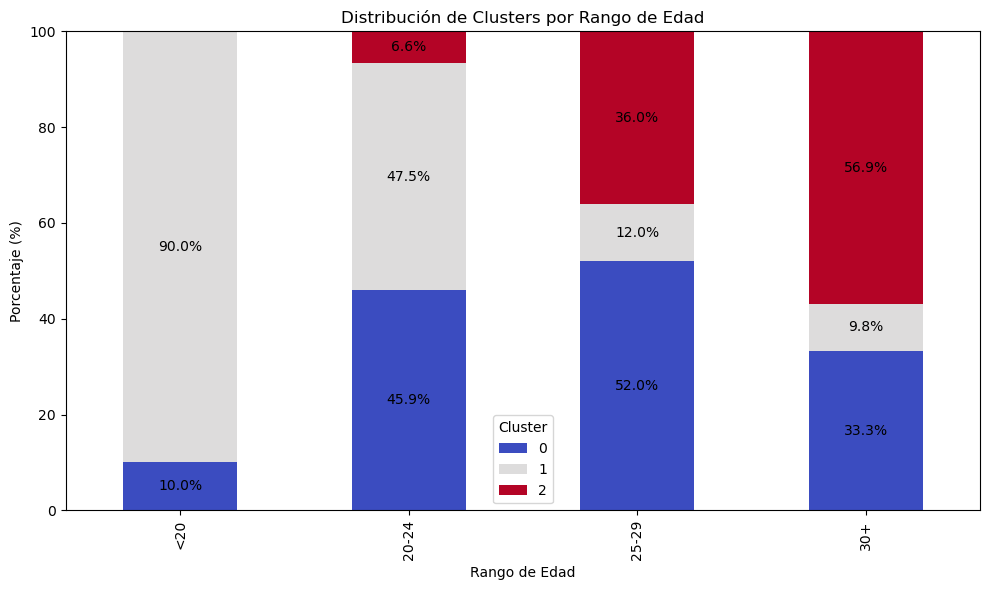

In [89]:
# Definir los rangos de edad
bins = [0, 19, 24, 29, float('inf')]
labels = ['<20', '20-24', '25-29', '30+']

# Crear la columna de rangos de edad
df_goalkeepers_only['age_group'] = pd.cut(df_goalkeepers_only['age'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia y normalizar por grupo de edad (cada fila sumará 100%)
contingency_table = pd.crosstab(df_goalkeepers_only['age_group'], df_goalkeepers_only['Cluster_k3'], normalize='index') * 100

# Graficar: cada barra representa un rango de edad, colores = clusters
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, age_group in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[age_group, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=0
            )
        cumulative += percentage

# Etiquetas y título
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Rango de Edad')
ax.set_title('Distribución de Clusters por Rango de Edad')
ax.set_ylim(0, 100)
plt.legend(title='Cluster')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Eliminar la columna auxiliar
df_goalkeepers_only.drop('age_group', axis=1, inplace=True)


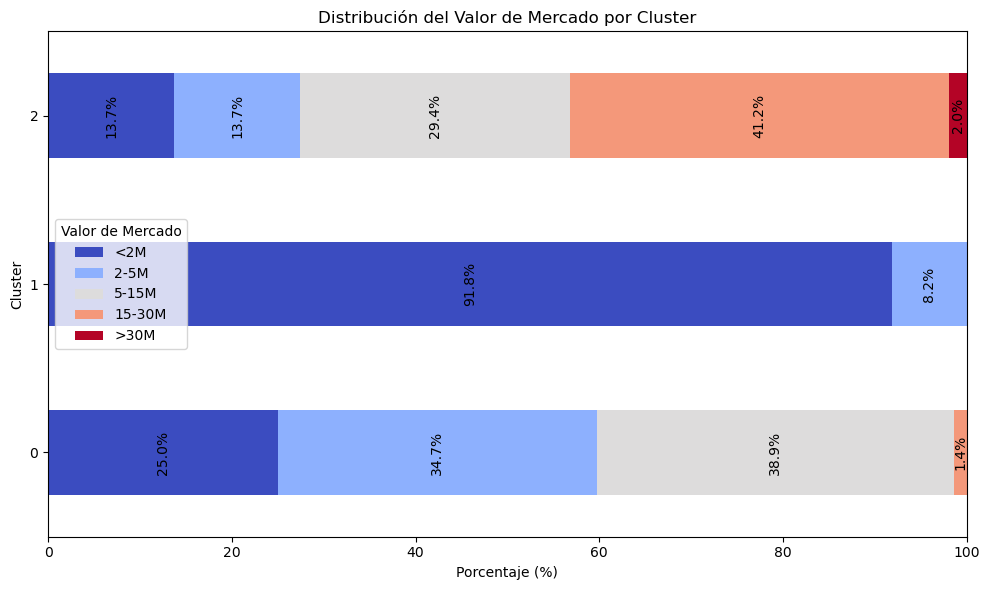

In [90]:
# Definir los rangos de valor de mercado
bins = [0, 2_000_000, 5_000_000, 15_000_000, 30_000_000, float('inf')]
labels = ['<2M', '2-5M', '5-15M', '15-30M', '>30M']

# Crear los grupos de valor de mercado directamente
market_value_groups = pd.cut(df_goalkeepers_only['value'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], market_value_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (en vertical)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for market_value, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,
                i,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90  # Mostrar el porcentaje en vertical
            )
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución del Valor de Mercado por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Valor de Mercado')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


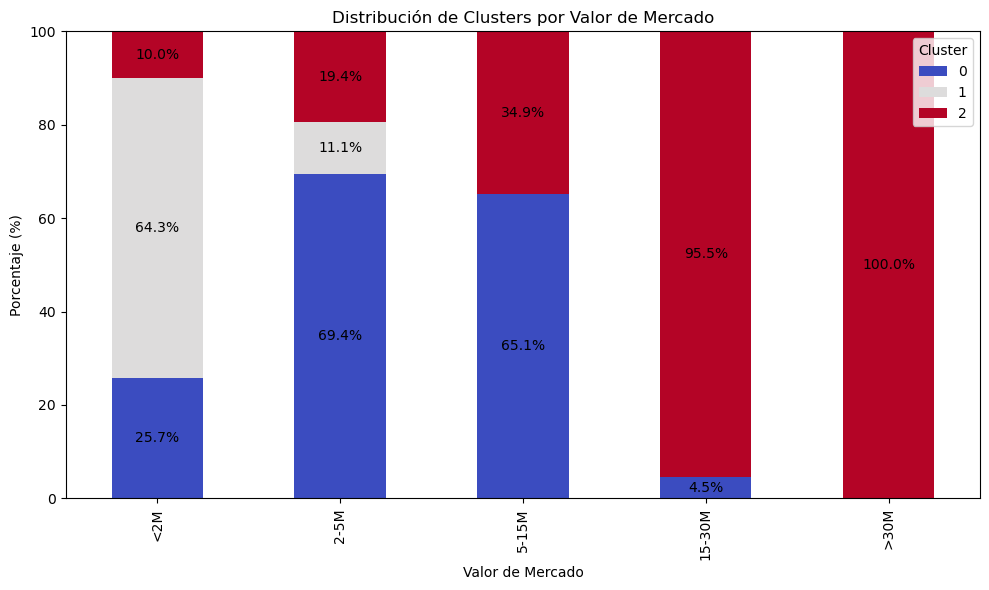

In [91]:
# Definir los rangos de valor de mercado
bins = [0, 2_000_000, 5_000_000, 15_000_000, 30_000_000, float('inf')]
labels = ['<2M', '2-5M', '5-15M', '15-30M', '>30M']

# Crear los grupos de valor de mercado
df_goalkeepers_only['value_group'] = pd.cut(df_goalkeepers_only['value'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por grupo de valor de mercado
contingency_table = pd.crosstab(df_goalkeepers_only['value_group'], df_goalkeepers_only['Cluster_k3'], normalize='index') * 100

# Graficar: eje X = rangos de valor, eje Y = %, colores = clusters
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, value_group in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[value_group, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=0
            )
        cumulative += percentage

# Etiquetas y título
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Valor de Mercado')
ax.set_title('Distribución de Clusters por Valor de Mercado')
ax.set_ylim(0, 100)
plt.legend(title='Cluster')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Eliminar la columna auxiliar
df_goalkeepers_only.drop('value_group', axis=1, inplace=True)


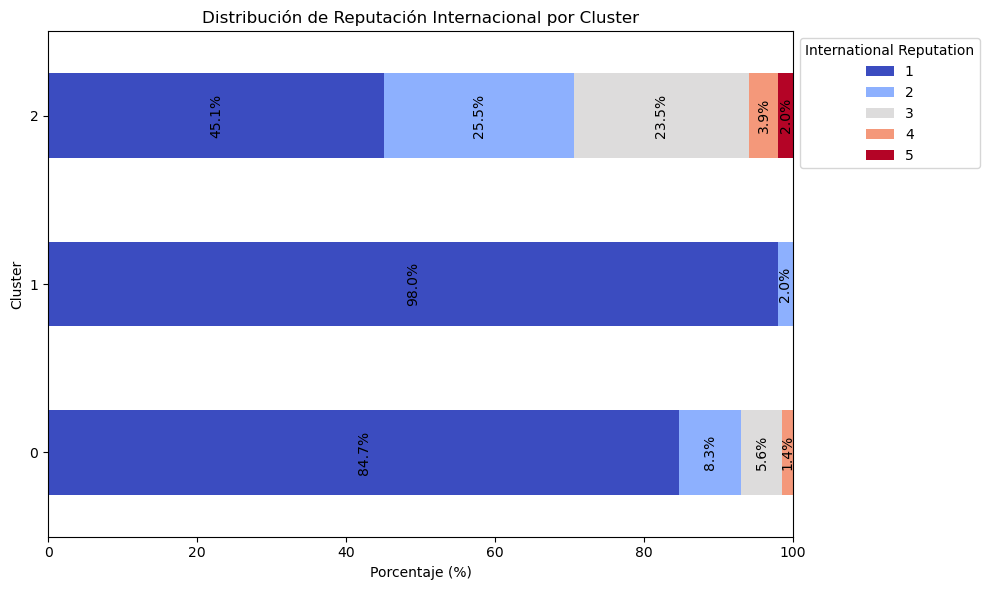

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna sea categórica con orden
df_goalkeepers_only['international_reputation'] = pd.Categorical(
    df_goalkeepers_only['international_reputation'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
)

# Crear tabla de contingencia (porcentaje por cluster)
contingency_table = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    df_goalkeepers_only['international_reputation'],
    normalize='index'
) * 100

# Crear el gráfico (horizontal)
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (en vertical)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for rep_level, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,  # x-position
                i,                            # y-position
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90  # Vertical
            )
        cumulative += percentage

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de Reputación Internacional por Cluster')
ax.set_xlim(0, 100)

# Leyenda
plt.legend(title='International Reputation', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


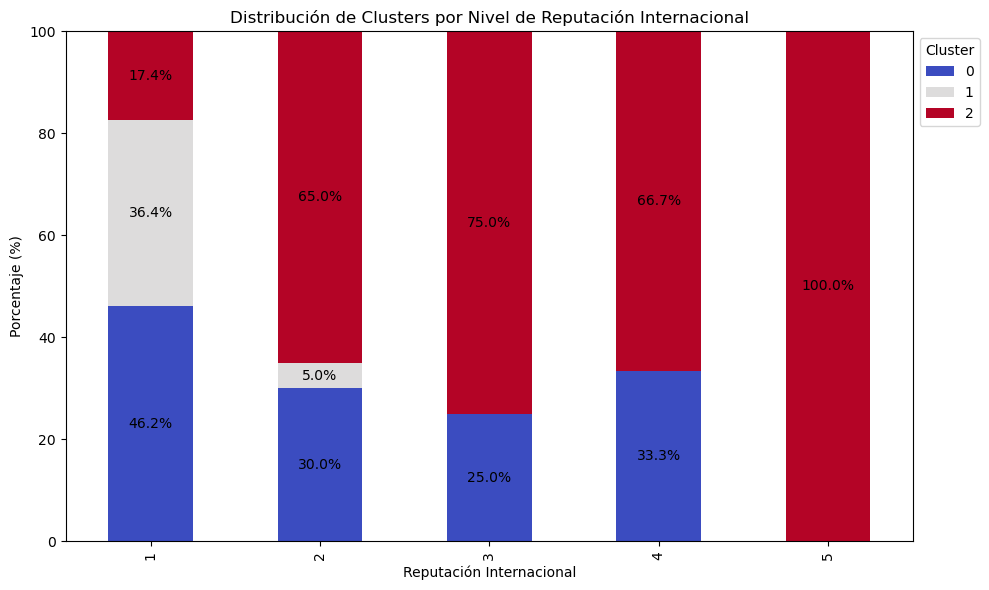

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna sea categórica y ordenada
df_goalkeepers_only['international_reputation'] = pd.Categorical(
    df_goalkeepers_only['international_reputation'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
)

# Crear tabla de contingencia y normalizar por reputación (cada barra = reputación, suma 100%)
contingency_table = pd.crosstab(
    df_goalkeepers_only['international_reputation'],
    df_goalkeepers_only['Cluster_k3'],
    normalize='index'
) * 100

# Crear el gráfico (barras verticales, eje X = reputación, colores = clusters)
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, rep_level in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[rep_level, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
        cumulative += percentage

# Etiquetas y título
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Reputación Internacional')
ax.set_title('Distribución de Clusters por Nivel de Reputación Internacional')
ax.set_ylim(0, 100)

# Leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


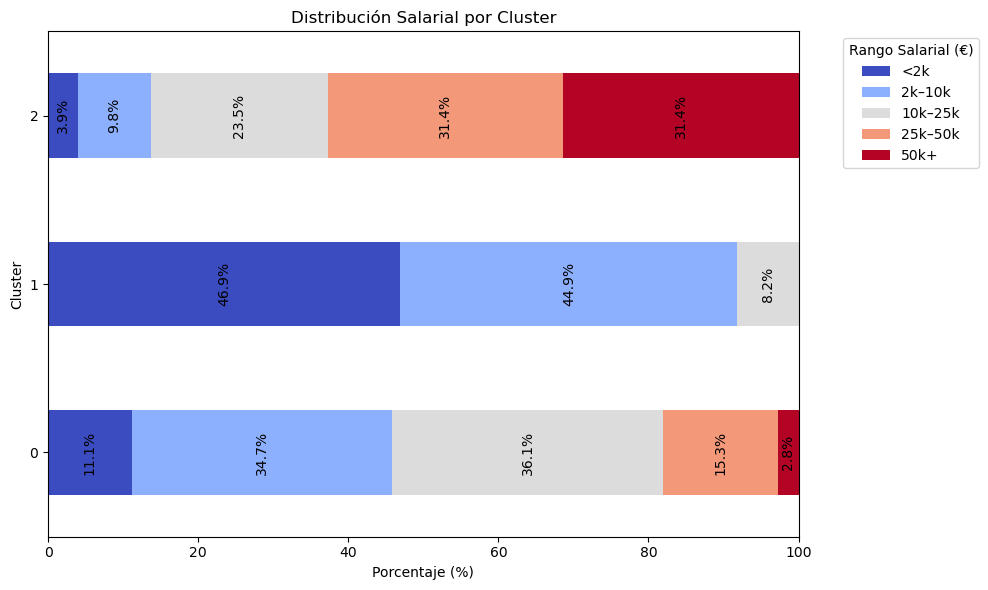

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna de rangos salariales
bins = [0, 2000, 10000, 25000, 50000, float('inf')]
labels = ['<2k', '2k–10k', '10k–25k', '25k–50k', '50k+']

df_goalkeepers_only['wage_group'] = pd.cut(df_goalkeepers_only['wage'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia (normalizada por cluster)
contingency_table = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    df_goalkeepers_only['wage_group'],
    normalize='index'
) * 100

# Gráfico apilado horizontal
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas de porcentaje dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for wage_range, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,  # posición x
                i,                            # posición y
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90
            )
        cumulative += percentage

# Etiquetas y leyenda
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución Salarial por Cluster')
ax.set_xlim(0, 100)
plt.legend(title='Rango Salarial (€)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_goalkeepers_only.drop('wage_group', axis=1, inplace=True)


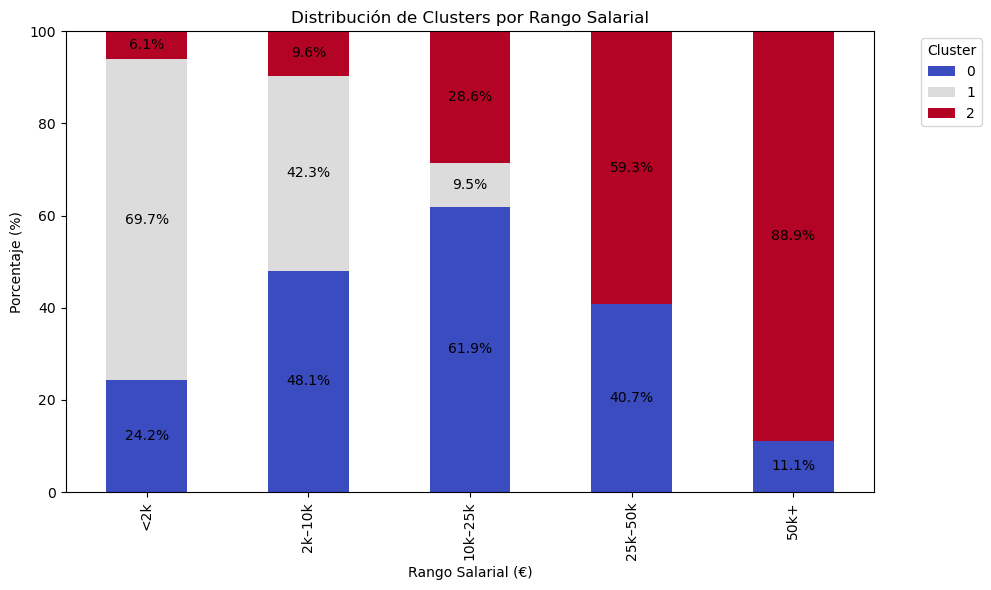

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna de rangos salariales
bins = [0, 2000, 10000, 25000, 50000, float('inf')]
labels = ['<2k', '2k–10k', '10k–25k', '25k–50k', '50k+']

df_goalkeepers_only['wage_group'] = pd.cut(df_goalkeepers_only['wage'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia y normalizar por grupo salarial (cada barra suma 100%)
contingency_table = pd.crosstab(
    df_goalkeepers_only['wage_group'],
    df_goalkeepers_only['Cluster_k3'],
    normalize='index'
) * 100

# Gráfico de barras verticales: eje X = rango salarial, colores = clusters
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas de porcentaje dentro de las barras
for i, wage_group in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[wage_group, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
        cumulative += percentage

# Etiquetas y leyenda
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Rango Salarial (€)')
ax.set_title('Distribución de Clusters por Rango Salarial')
ax.set_ylim(0, 100)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_goalkeepers_only.drop('wage_group', axis=1, inplace=True)


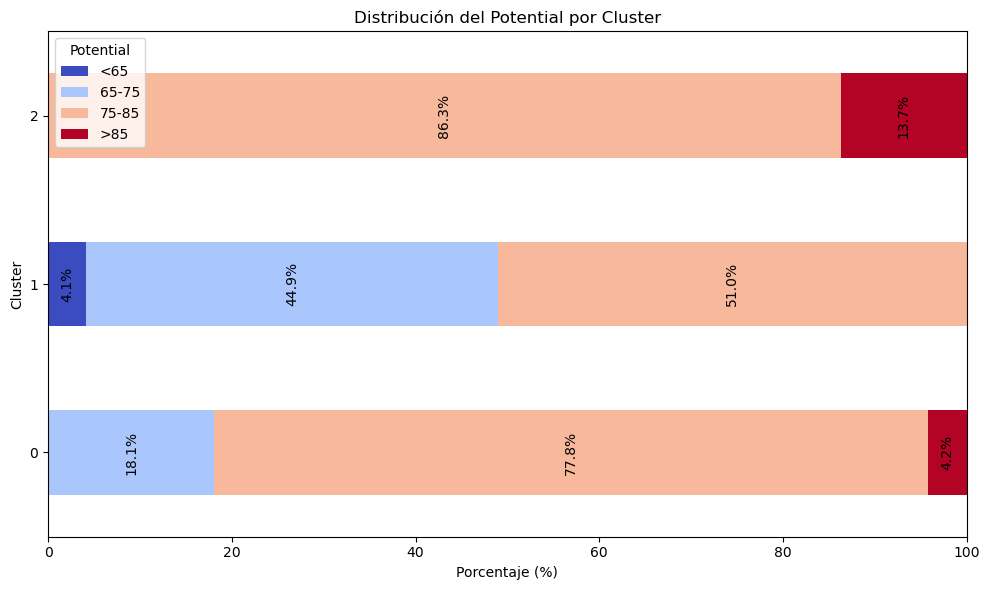

In [96]:
# Definir los rangos de potential
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de potential directamente
potential_groups = pd.cut(df_goalkeepers_only['potential'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], potential_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (en vertical)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for pot_range, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,
                i,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90  # Mostrar los porcentajes en vertical
            )
        cumulative += percentage

# Etiquetas y formato
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución del Potential por Cluster')
ax.set_xlim(0, 100)
plt.legend(title='Potential')

# Mostrar
plt.tight_layout()
plt.show()


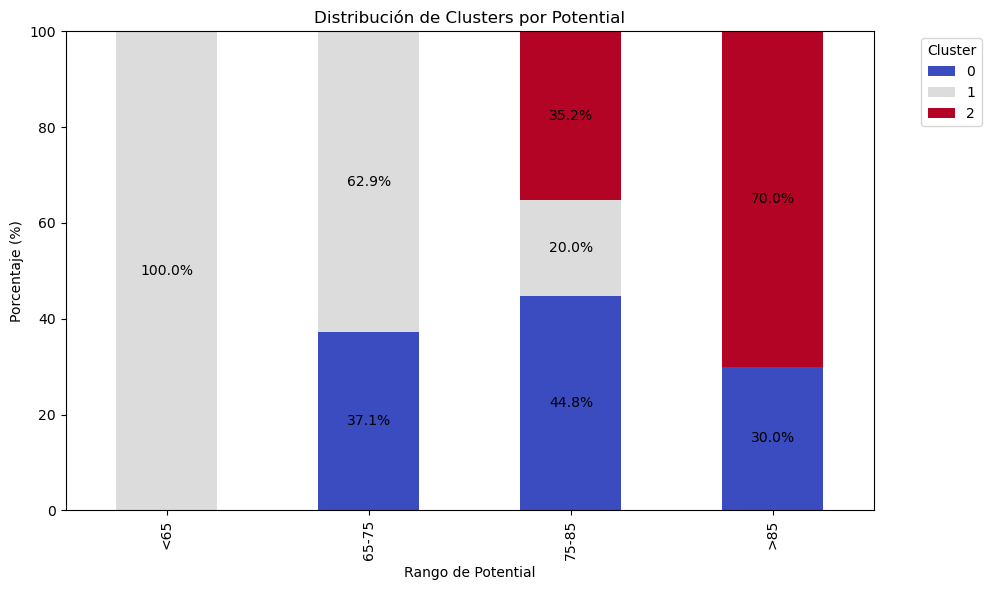

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los rangos de potential
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear grupos de potential
df_goalkeepers_only['potential_group'] = pd.cut(df_goalkeepers_only['potential'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por grupo de potential
contingency_table = pd.crosstab(df_goalkeepers_only['potential_group'], df_goalkeepers_only['Cluster_k3'], normalize='index') * 100

# Gráfico de barras verticales: eje X = potential group, colores = clusters
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas de porcentaje dentro de las barras
for i, pot_group in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[pot_group, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
        cumulative += percentage

# Etiquetas y formato
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Rango de Potential')
ax.set_title('Distribución de Clusters por Potential')
ax.set_ylim(0, 100)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar
plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_goalkeepers_only.drop('potential_group', axis=1, inplace=True)


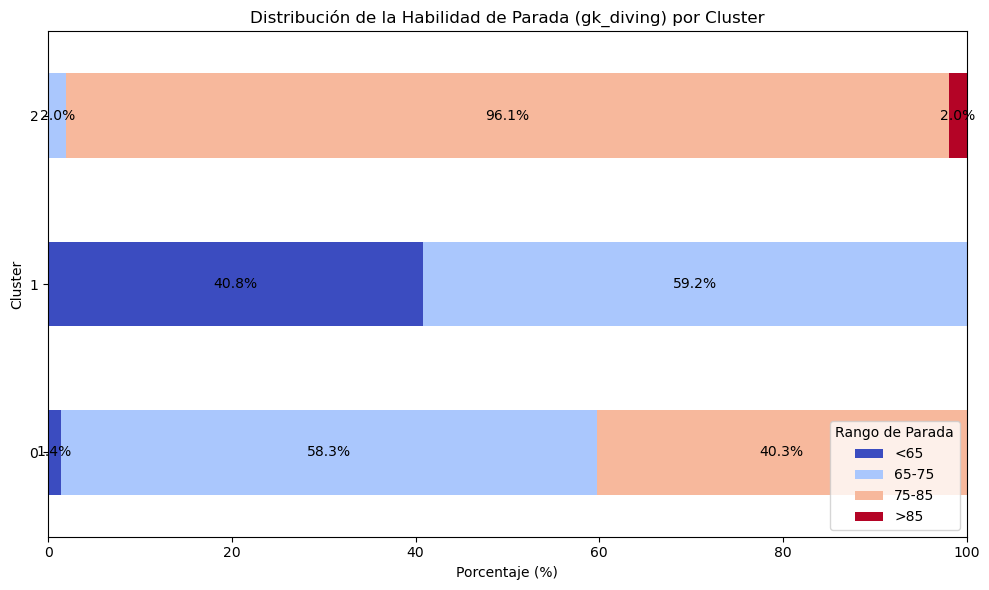

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los rangos de la variable gk_diving
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de gk_diving directamente
gk_diving_groups = pd.cut(df_goalkeepers_only['gk_diving'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], gk_diving_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for gk_diving_range, percentage in values.items():
        if percentage > 0:
            ax.text(cumulative + percentage / 2, i, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de la Habilidad de Parada (gk_diving) por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Parada')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

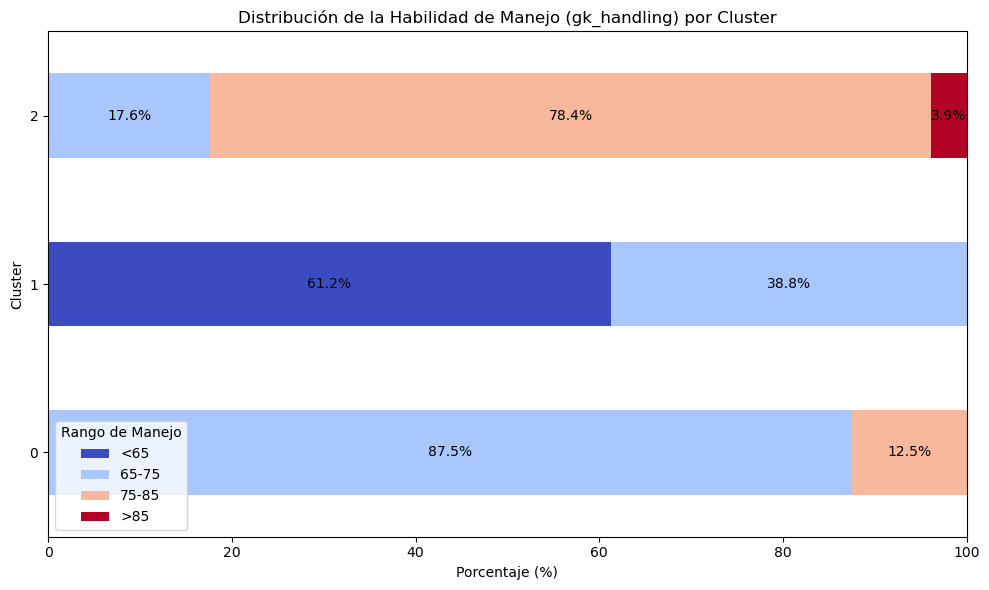

In [99]:
# Definir los rangos de la variable gk_handling
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de gk_handling directamente
gk_handling_groups = pd.cut(df_goalkeepers_only['gk_handling'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], gk_handling_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for gk_handling_range, percentage in values.items():
        if percentage > 0:
            ax.text(cumulative + percentage / 2, i, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de la Habilidad de Manejo (gk_handling) por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Manejo')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

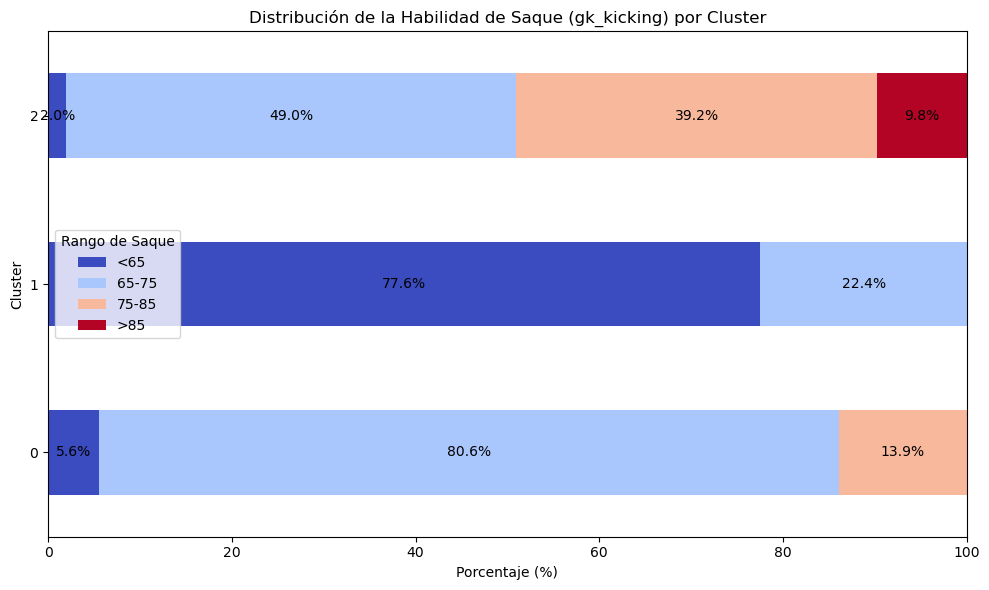

In [100]:
# Definir los rangos de la variable gk_kicking
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de gk_kicking directamente
gk_kicking_groups = pd.cut(df_goalkeepers_only['gk_kicking'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], gk_kicking_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for gk_kicking_range, percentage in values.items():
        if percentage > 0:
            ax.text(cumulative + percentage / 2, i, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de la Habilidad de Saque (gk_kicking) por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Saque')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

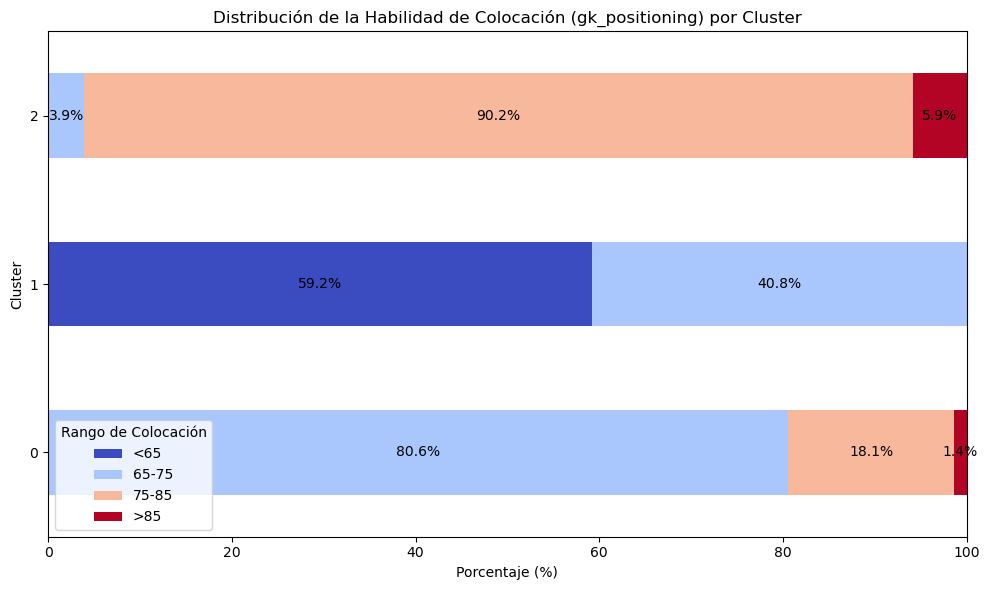

In [101]:
# Definir los rangos de la variable gk_positioning
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de gk_positioning directamente
gk_positioning_groups = pd.cut(df_goalkeepers_only['gk_positioning'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], gk_positioning_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for gk_positioning_range, percentage in values.items():
        if percentage > 0:
            ax.text(cumulative + percentage / 2, i, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de la Habilidad de Colocación (gk_positioning) por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Colocación')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

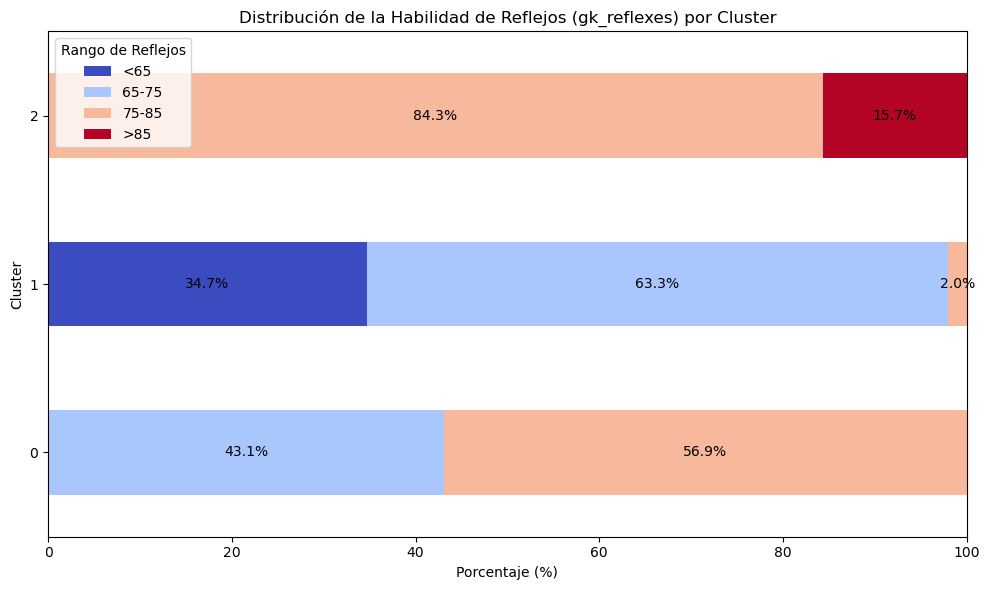

In [102]:
# Definir los rangos de la variable gk_reflexes
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de gk_reflexes directamente
gk_reflexes_groups = pd.cut(df_goalkeepers_only['gk_reflexes'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], gk_reflexes_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for gk_reflexes_range, percentage in values.items():
        if percentage > 0:
            ax.text(cumulative + percentage / 2, i, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de la Habilidad de Reflejos (gk_reflexes) por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Reflejos')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

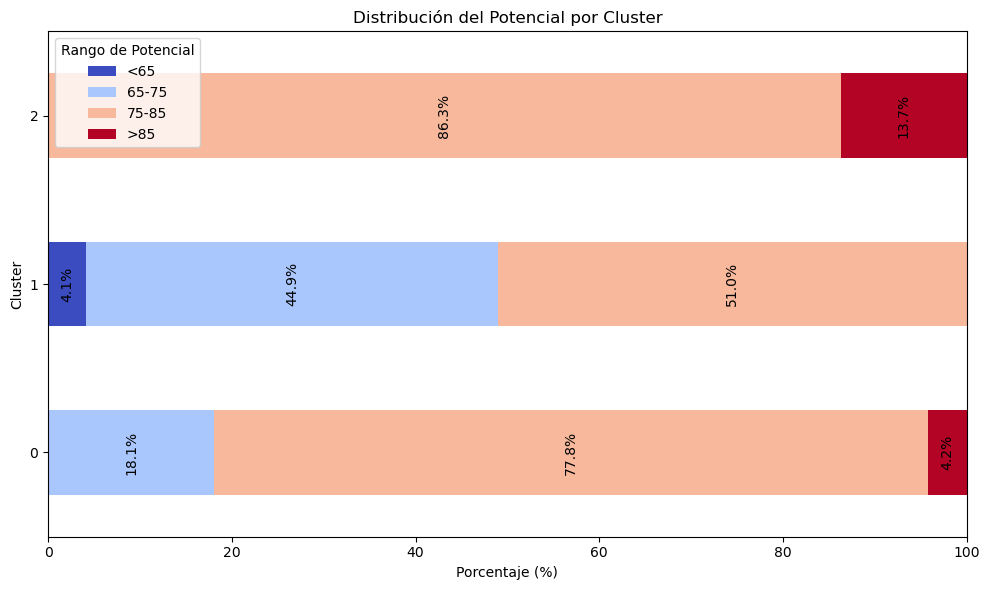

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los rangos de la variable potential
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de potential directamente
potential_groups = pd.cut(df_goalkeepers_only['potential'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_goalkeepers_only['Cluster_k3'], potential_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (rotadas verticalmente)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for potential_range, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2, i,
                f'{percentage:.1f}%',
                ha='center', va='center',
                color='black', fontsize=10,
                rotation=90  # Texto en vertical
            )
        cumulative += percentage

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución del Potencial por Cluster')
ax.set_xlim(0, 100)

# Añadir leyenda
plt.legend(title='Rango de Potencial')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


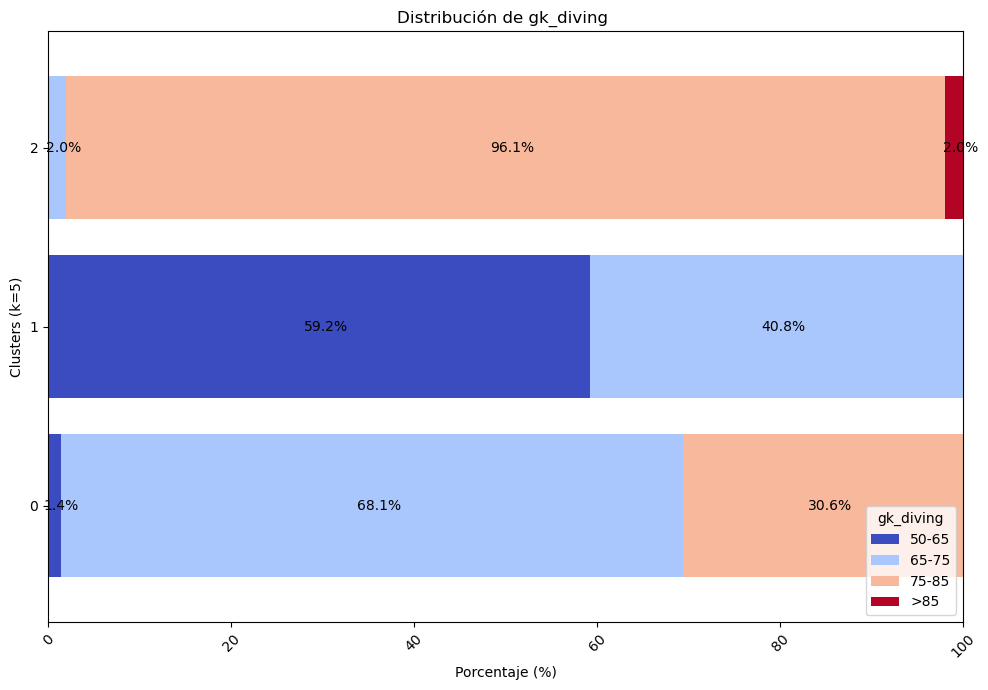

In [104]:
# Definir rangos de gk_diving con las nuevas etiquetas
diving_bins = [0, 50, 65, 75, 85, float('inf')]
diving_labels = ['<50', '50-65', '65-75', '75-85', '>85'] # Se cambian las etiquetas

# Crear tabla de contingencia con la distribución de gk_diving por cluster
contingency_table_diving = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    pd.cut(df_goalkeepers_only['gk_diving'], bins=diving_bins, labels=diving_labels),
    normalize='index'
) * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 7))
contingency_table_diving.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='coolwarm',
    width=0.8
)

# Añadir etiquetas dentro de las barras, pero solo si el valor es mayor que 0
for container in ax.containers:
    labels = [f'{bar.get_width():.1f}%' if bar.get_width() > 0 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=5, rotation=0)

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Clusters (k=5)')
ax.set_title('Distribución de gk_diving ')
ax.set_xlim(0, 100)

# Mejorar la legibilidad ajustando las etiquetas del eje X (rotarlas para evitar solapamientos)
plt.xticks(rotation=45)

# Ajustar la visualización
plt.tight_layout()
plt.show()

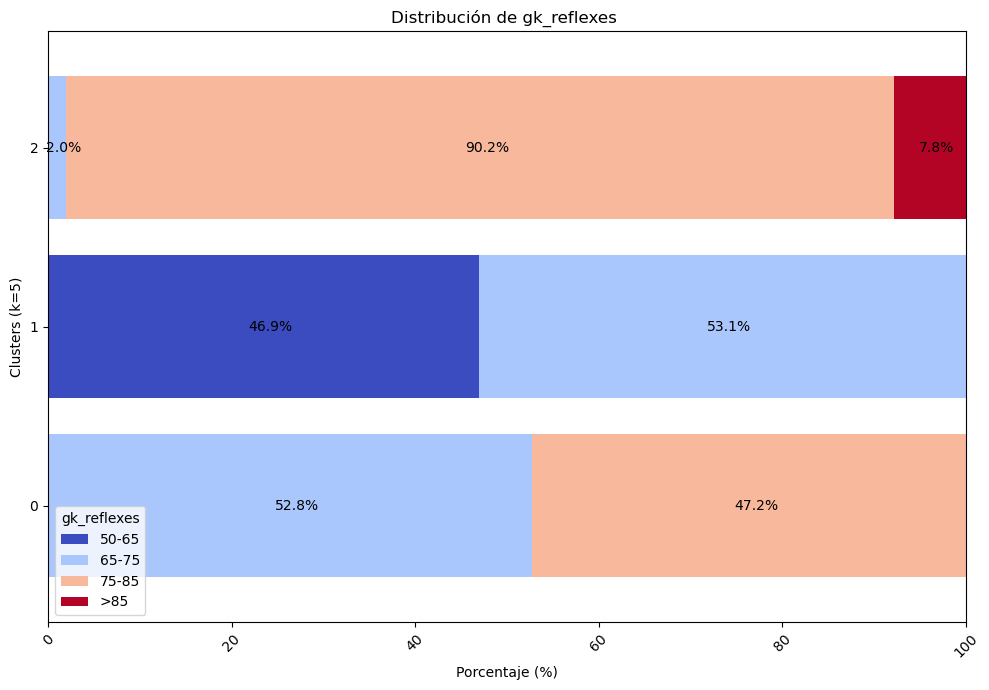

In [105]:
# Definir rangos de gk_diving con las nuevas etiquetas
diving_bins = [0, 50, 65, 75, 85, float('inf')]
diving_labels = ['<50', '50-65', '65-75', '75-85', '>85'] # Se cambian las etiquetas

# Crear tabla de contingencia con la distribución de gk_diving por cluster
contingency_table_diving = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    pd.cut(df_goalkeepers_only['gk_reflexes'], bins=diving_bins, labels=diving_labels),
    normalize='index'
) * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 7))
contingency_table_diving.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='coolwarm',
    width=0.8
)

# Añadir etiquetas dentro de las barras, pero solo si el valor es mayor que 0
for container in ax.containers:
    labels = [f'{bar.get_width():.1f}%' if bar.get_width() > 0 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=5, rotation=0)

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Clusters (k=5)')
ax.set_title('Distribución de gk_reflexes ')
ax.set_xlim(0, 100)

# Mejorar la legibilidad ajustando las etiquetas del eje X (rotarlas para evitar solapamientos)
plt.xticks(rotation=45)

# Ajustar la visualización
plt.tight_layout()
plt.show()

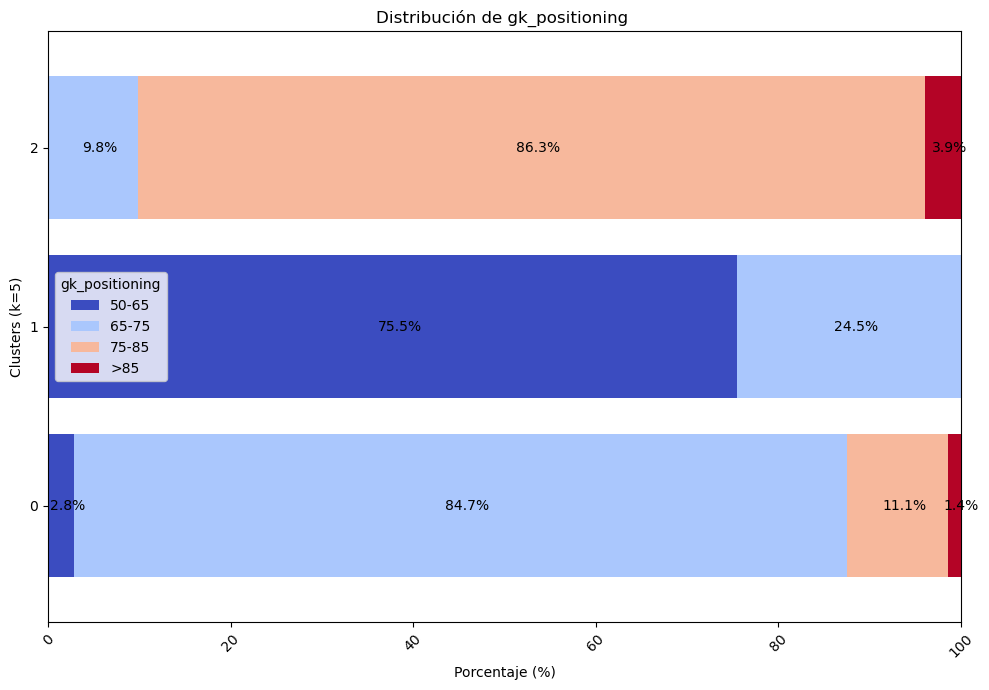

In [106]:
# Definir rangos de gk_diving con las nuevas etiquetas
diving_bins = [0, 50, 65, 75, 85, float('inf')]
diving_labels = ['<50', '50-65', '65-75', '75-85', '>85'] # Se cambian las etiquetas

# Crear tabla de contingencia con la distribución de gk_diving por cluster
contingency_table_diving = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    pd.cut(df_goalkeepers_only['gk_positioning'], bins=diving_bins, labels=diving_labels),
    normalize='index'
) * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 7))
contingency_table_diving.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='coolwarm',
    width=0.8
)

# Añadir etiquetas dentro de las barras, pero solo si el valor es mayor que 0
for container in ax.containers:
    labels = [f'{bar.get_width():.1f}%' if bar.get_width() > 0 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=5, rotation=0)

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Clusters (k=5)')
ax.set_title('Distribución de gk_positioning ')
ax.set_xlim(0, 100)

# Mejorar la legibilidad ajustando las etiquetas del eje X (rotarlas para evitar solapamientos)
plt.xticks(rotation=45)

# Ajustar la visualización
plt.tight_layout()
plt.show()

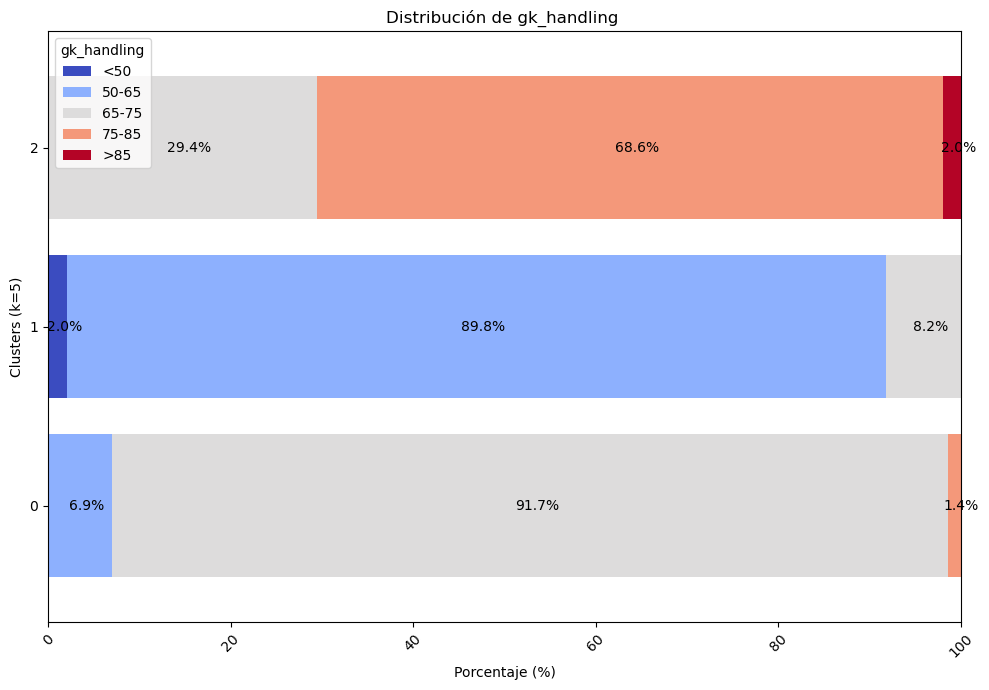

In [107]:
# Definir rangos de gk_diving con las nuevas etiquetas
diving_bins = [0, 50, 65, 75, 85, float('inf')]
diving_labels = ['<50', '50-65', '65-75', '75-85', '>85'] # Se cambian las etiquetas

# Crear tabla de contingencia con la distribución de gk_diving por cluster
contingency_table_diving = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    pd.cut(df_goalkeepers_only['gk_handling'], bins=diving_bins, labels=diving_labels),
    normalize='index'
) * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 7))
contingency_table_diving.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='coolwarm',
    width=0.8
)

# Añadir etiquetas dentro de las barras, pero solo si el valor es mayor que 0
for container in ax.containers:
    labels = [f'{bar.get_width():.1f}%' if bar.get_width() > 0 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=5, rotation=0)

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Clusters (k=5)')
ax.set_title('Distribución de gk_handling ')
ax.set_xlim(0, 100)

# Mejorar la legibilidad ajustando las etiquetas del eje X (rotarlas para evitar solapamientos)
plt.xticks(rotation=45)

# Ajustar la visualización
plt.tight_layout()
plt.show()

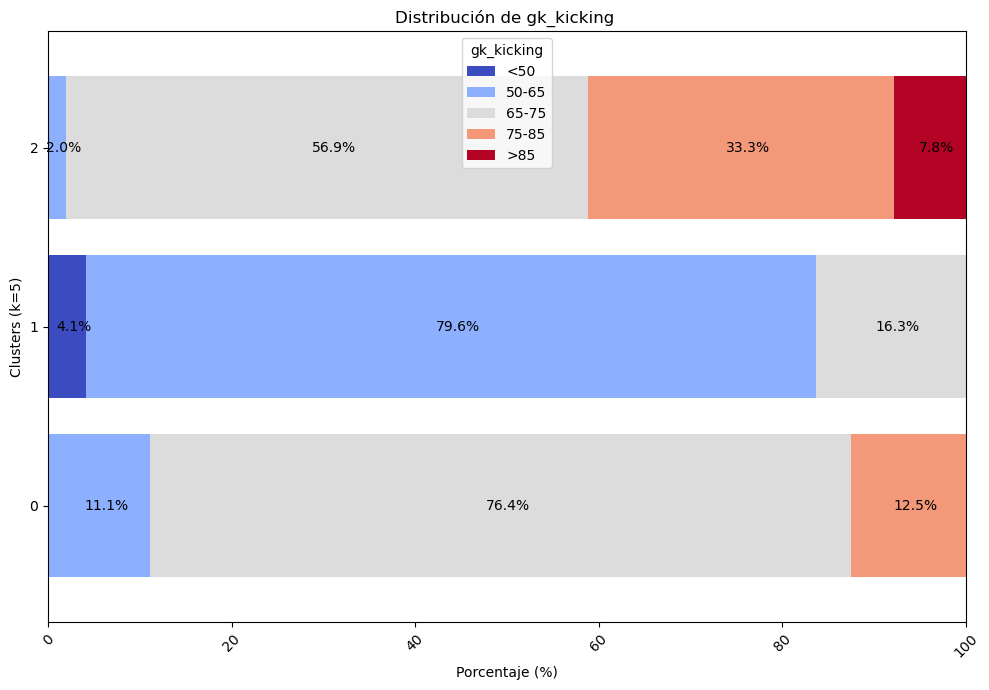

In [108]:
# Definir rangos de gk_diving con las nuevas etiquetas
diving_bins = [0, 50, 65, 75, 85, float('inf')]
diving_labels = ['<50', '50-65', '65-75', '75-85', '>85'] # Se cambian las etiquetas

# Crear tabla de contingencia con la distribución de gk_diving por cluster
contingency_table_diving = pd.crosstab(
    df_goalkeepers_only['Cluster_k3'],
    pd.cut(df_goalkeepers_only['gk_kicking'], bins=diving_bins, labels=diving_labels),
    normalize='index'
) * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 7))
contingency_table_diving.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='coolwarm',
    width=0.8
)

# Añadir etiquetas dentro de las barras, pero solo si el valor es mayor que 0
for container in ax.containers:
    labels = [f'{bar.get_width():.1f}%' if bar.get_width() > 0 else '' for bar in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, padding=5, rotation=0)

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Clusters (k=5)')
ax.set_title('Distribución de gk_kicking ')
ax.set_xlim(0, 100)

# Mejorar la legibilidad ajustando las etiquetas del eje X (rotarlas para evitar solapamientos)
plt.xticks(rotation=45)

# Ajustar la visualización
plt.tight_layout()
plt.show()

In [109]:
df.columns

Index(['age', 'overall_rating', 'potential', 'height', 'weight', 'foot',
       'best_overall', 'best_position', 'growth', 'value', 'wage',
       'release_clause', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions',
       'att._position', 'vision', 'penalties', 'composure',
       'defensive_awareness', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'base_stats', 'international_reputation', 'defending_pace',
       'player_name', 'position', 'team', 'contract_start', 'contract_end',
       'core_position', 'Cluster'],
      dtype='object')

ANÁLISIS DEL CLUSTER DE JUGADORES DE CAMPO

In [110]:
df_field_players = df[df['Cluster'] == 1]

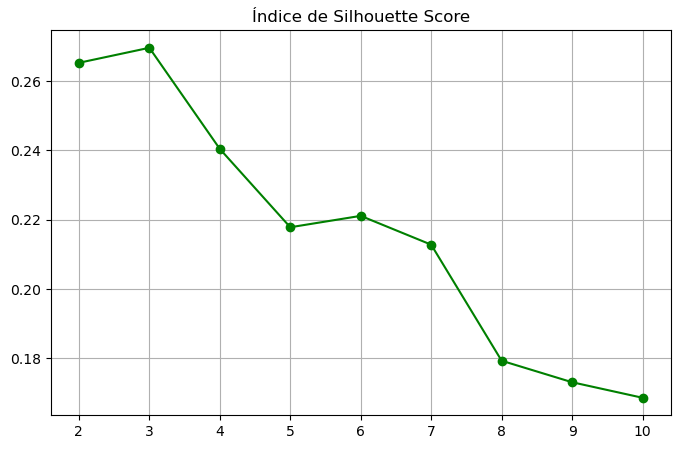

✅ El número óptimo de clusters según Silhouette es: 3


In [111]:
columns_for_clustering_field_players = ["heading_accuracy", "acceleration",
                                "ball_control","agility","dribbling", 
                                "short_passing", "long_passing", "finishing", 
                                "shot_power", "long_shots", "att._position", "vision", "composure", "interceptions",
                                "defensive_awareness","sliding_tackle","standing_tackle"]


#Filtrar solo las columnas numéricas y asegurarse de que no haya valores categóricos
df_clustering_field_players = df_field_players[columns_for_clustering_field_players].copy()

scaler = StandardScaler()
df_scaled_array_field_players = scaler.fit_transform(df_clustering_field_players)

# Definir el rango de k
range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled_array_field_players)
    silhouette_avg = silhouette_score(df_scaled_array_field_players, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

#Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='-', color='g')
plt.title("Índice de Silhouette Score")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Mostrar el número óptimo de clusters
optimal_k = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"✅ El número óptimo de clusters según Silhouette es: {optimal_k}")


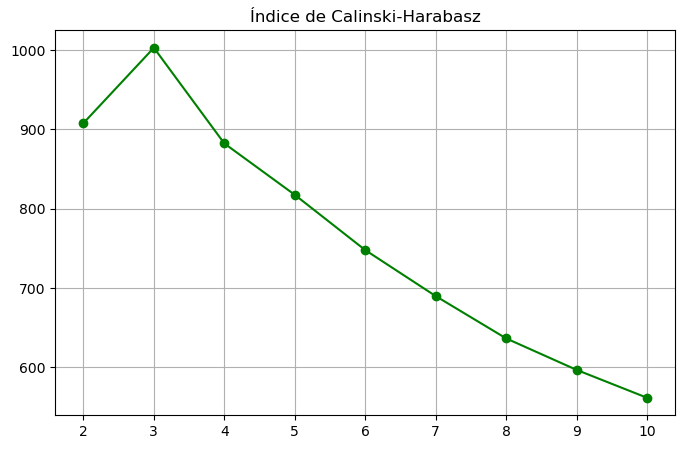

✅ El número óptimo de clusters según Calinski-Harabasz es: 3


In [112]:
#Calcular el Índice de Calinski-Harabasz para distintos valores de clusters
range_n_clusters = list(range(2, 11))  # Probar de 2 a 10 clusters
calinski_harabasz_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled_array_field_players)
    ch_score = calinski_harabasz_score(df_scaled_array_field_players, cluster_labels)
    calinski_harabasz_scores.append(ch_score)

#Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, calinski_harabasz_scores, marker='o', linestyle='-', color='g')
plt.title("Índice de Calinski-Harabasz")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Mostrar el número óptimo de clusters
optimal_k_ch = range_n_clusters[np.argmax(calinski_harabasz_scores)]
print(f"✅ El número óptimo de clusters según Calinski-Harabasz es: {optimal_k_ch}")

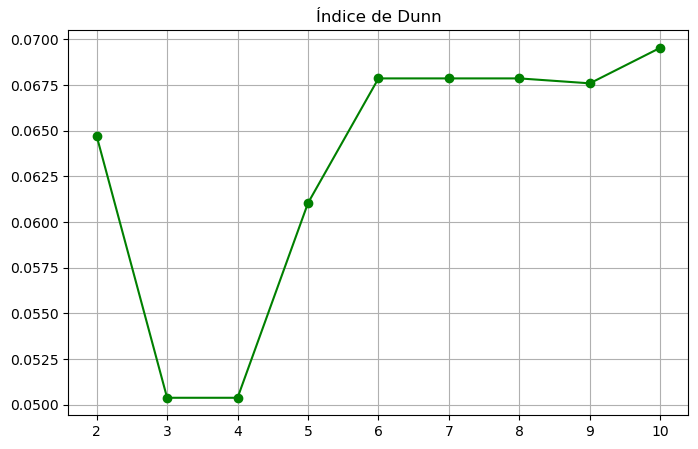

✅ El número óptimo de clusters según el Índice de Dunn es: 10


In [113]:
#Función para calcular el Índice de Dunn
def dunn_index(X, labels):
    """
    Calcula el Índice de Dunn para una partición de clustering.
    X: Datos
    labels: Etiquetas de los clusters asignados por K-Means
    """
    unique_clusters = np.unique(labels)
    cluster_distances = []
    cluster_diameters = []

    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                # Distancia mínima entre puntos de diferentes clusters
                min_intercluster_distance = np.min(
                    pairwise_distances(X[labels == i], X[labels == j])
                )
                cluster_distances.append(min_intercluster_distance)

        # Diámetro del cluster (máxima distancia dentro del mismo cluster)
        intra_distances = pairwise_distances(X[labels == i])
        cluster_diameter = np.max(intra_distances)
        cluster_diameters.append(cluster_diameter)

    return np.min(cluster_distances) / np.max(cluster_diameters)

#Calcular el Índice de Dunn para distintos valores de clusters
range_n_clusters = list(range(2, 11))  # Probar de 2 a 10 clusters
dunn_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_clustering_field_players.to_numpy()) 
    dunn_score = dunn_index(df_clustering_field_players.to_numpy(), cluster_labels)
    dunn_scores.append(dunn_score)

#Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, dunn_scores, marker='o', linestyle='-', color='g')
plt.title("Índice de Dunn")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Mostrar el número óptimo de clusters
optimal_k_dunn = range_n_clusters[np.argmax(dunn_scores)]
print(f"✅ El número óptimo de clusters según el Índice de Dunn es: {optimal_k_dunn}")


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\1071771276.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



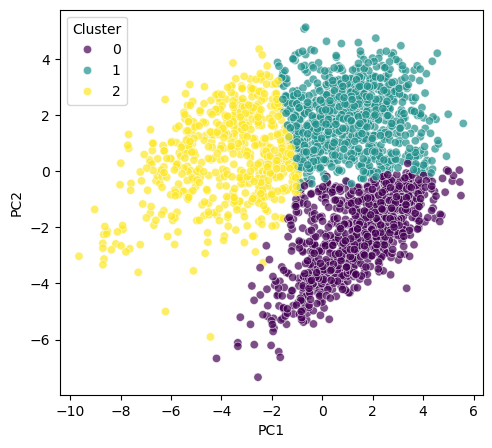

In [114]:
df_scaled_field_players = pd.DataFrame(df_scaled_array_field_players, columns=df_clustering_field_players.columns, index=df_clustering_field_players.index)

#Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_field_players["Cluster_k3"] = kmeans.fit_predict(df_scaled_field_players)

#Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled_array_field_players)

#Obtener etiquetas de los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_K2'] = kmeans.labels_

#Graficar los clusters con K=2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster_K2"], palette="viridis", alpha=0.7)
plt.legend(title="Cluster")

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\474364582.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



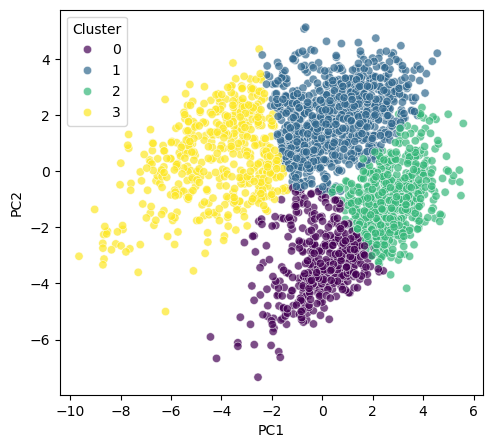

In [115]:
df_scaled_field_players = pd.DataFrame(df_scaled_array_field_players, columns=df_clustering_field_players.columns, index=df_clustering_field_players.index)

#Aplicar K-Means
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_field_players["Cluster_k4"] = kmeans_k4.fit_predict(df_scaled_field_players)

#Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled_array_field_players)

#Obtener etiquetas de los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_K4'] = kmeans_k4.labels_

#Graficar los clusters con K=2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster_K4"], palette="viridis", alpha=0.7)
plt.legend(title="Cluster")


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\3092707017.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



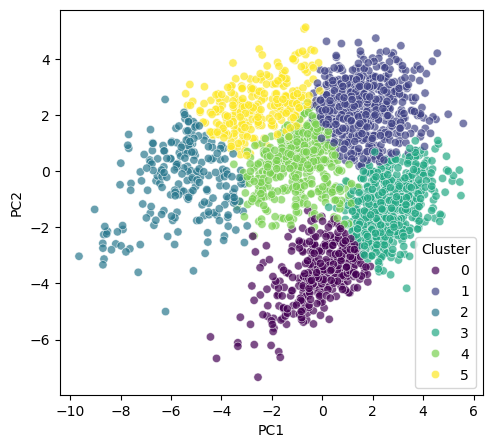

In [116]:
df_scaled_field_players = pd.DataFrame(df_scaled_array_field_players, columns=df_clustering_field_players.columns, index=df_clustering_field_players.index)

#Aplicar K-Means
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_field_players["Cluster_k6"] = kmeans.fit_predict(df_scaled_field_players)

#Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled_array_field_players)

#Obtener etiquetas de los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster_K6'] = kmeans.labels_

#Graficar los clusters con K=2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster_K6"], palette="viridis", alpha=0.7)
plt.legend(title="Cluster")

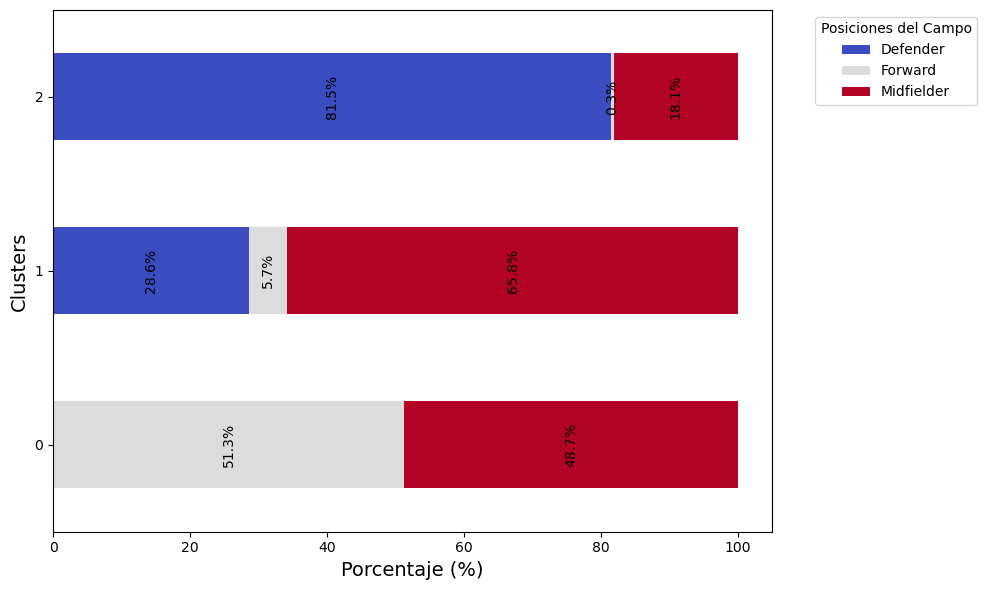

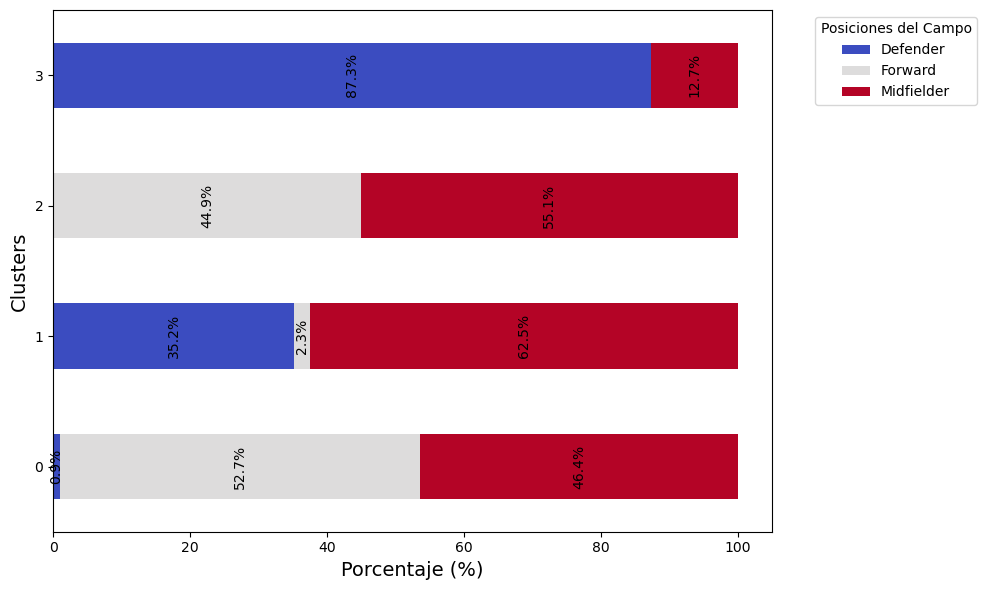

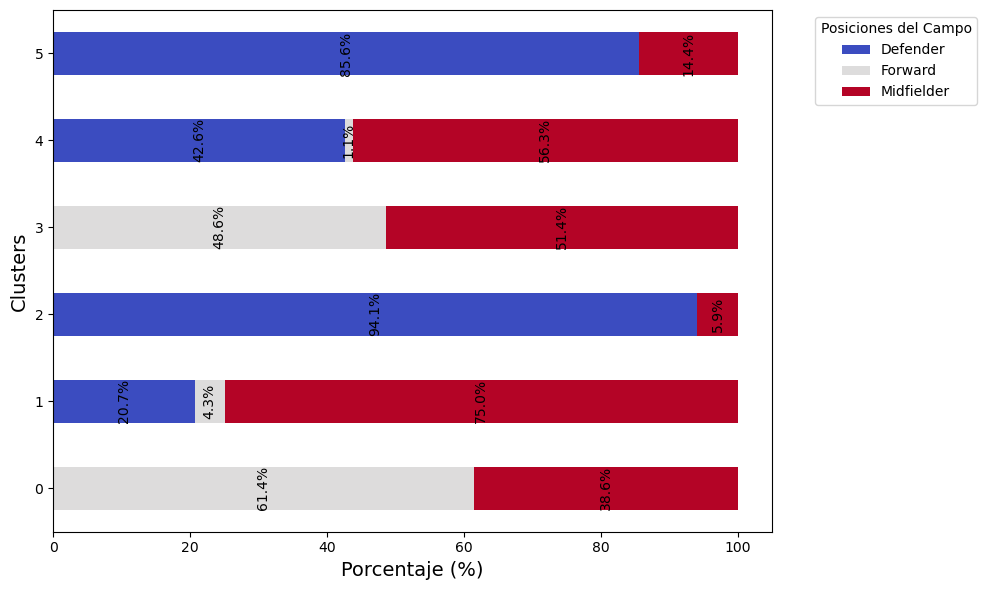

In [117]:
# Función para generar gráficos de contingencia con porcentajes en vertical
def plot_contingency(df, cluster_col, position_col, k):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Eliminar 'Goalkeeper' de la columna de posiciones
    df_filtered = df[df[position_col] != 'Goalkeeper']

    # Crear la tabla de contingencia sin 'Goalkeeper'
    contingency = (
        pd.crosstab(df_filtered[cluster_col], df_filtered[position_col],
                    normalize='index') * 100
    ).round(2)

    # Crear el gráfico de barras apiladas
    ax = contingency.plot(kind='barh', stacked=True, figsize=(10, 6), cmap='coolwarm')
    ax.set_xlabel('Porcentaje (%)', fontsize=14)
    ax.set_ylabel('Clusters', fontsize=14)

    # Modificar la leyenda para que no aparezca 'Goalkeeper'
    ax.legend(title='Posiciones del Campo', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Añadir etiquetas dentro de las barras (rotadas 90°)
    for bar in ax.patches:
        width = bar.get_width()
        if width > 0:                           # solo etiquetar si hay porcentaje
            x_position = bar.get_x() + width / 2
            y_position = bar.get_y() + bar.get_height() / 2
            ax.text(
                x_position, y_position,
                f'{width:.1f}%',
                ha='center', va='center',
                fontsize=10, color='black',
                rotation=90          # ← texto en vertical
            )

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
plot_contingency(df_field_players, 'Cluster_k3', 'core_position', 3)
plot_contingency(df_field_players, 'Cluster_k4', 'core_position', 4)
plot_contingency(df_field_players, 'Cluster_k6', 'core_position', 6)


In [118]:
import plotly.graph_objects as go

# Asegurarse de que no hay espacios en los nombres de posiciones
df_field_players["core_position"] = df_field_players["core_position"].str.strip()

# Crear etiquetas de nodos en orden fijo
position_labels = ["Defender", "Midfielder", "Forward"]
k3_labels = [f"K3 Cluster {i}" for i in sorted(df_field_players["Cluster_k3"].unique())]
k4_labels = [f"K4 Cluster {i}" for i in sorted(df_field_players["Cluster_k4"].unique())]
k6_labels = [f"K6 Cluster {i}" for i in sorted(df_field_players["Cluster_k6"].unique())]

labels = position_labels + k3_labels + k4_labels + k6_labels
label_to_index = {label: idx for idx, label in enumerate(labels)}

# Colores por posición base
position_colors = {
    "Defender": "rgba(255, 215, 0, 0.6)",    # dorado
    "Midfielder": "rgba(0, 128, 255, 0.6)",  # azul
    "Forward": "rgba(255, 0, 0, 0.6)",       # rojo
}

# Función para asignar color según el nodo fuente
def get_color_by_source(source_idx):
    label = labels[source_idx]
    if label in position_labels:
        return position_colors[label]
    elif "K3 Cluster" in label:
        cluster = int(label.split()[-1])
        pos = df_field_players[df_field_players["Cluster_k3"] == cluster]["core_position"].mode()[0]
        return position_colors.get(pos, "rgba(160,160,160,0.5)")
    elif "K4 Cluster" in label:
        cluster = int(label.split()[-1])
        pos = df_field_players[df_field_players["Cluster_k4"] == cluster]["core_position"].mode()[0]
        return position_colors.get(pos, "rgba(160,160,160,0.5)")
    elif "K6 Cluster" in label:
        cluster = int(label.split()[-1])
        pos = df_field_players[df_field_players["Cluster_k6"] == cluster]["core_position"].mode()[0]
        return position_colors.get(pos, "rgba(160,160,160,0.5)")
    else:
        return "rgba(160,160,160,0.5)"

# Función para crear enlaces con colores por origen
def build_links(df, source_col, target_col, source_prefix, target_prefix):
    temp = df.groupby([source_col, target_col]).size().reset_index(name='count')

    def label_for(val, prefix):
        if isinstance(val, str):
            return val.strip() if prefix == "" else f"{prefix} {val.strip()}"
        else:
            return f"{prefix} Cluster {val}"

    temp["source"] = temp[source_col].apply(lambda x: label_to_index[label_for(x, source_prefix)])
    temp["target"] = temp[target_col].apply(lambda x: label_to_index[label_for(x, target_prefix)])
    temp["color"] = temp["source"].apply(get_color_by_source)
    return temp

# Crear enlaces para cada transición
pos_k3 = build_links(df_field_players, "core_position", "Cluster_k3", "", "K3")
k3_k4 = build_links(df_field_players, "Cluster_k3", "Cluster_k4", "K3", "K4")
k4_k6 = build_links(df_field_players, "Cluster_k4", "Cluster_k6", "K4", "K6")

# Concatenar todos los enlaces
all_links = pd.concat([pos_k3, k3_k4, k4_k6], ignore_index=True)

# Crear el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=all_links["source"],
        target=all_links["target"],
        value=all_links["count"],
        color=all_links["color"]
    )
)])
fig.update_layout(
    title_text="Distribución de jugadores por posición y clusters (K=3, K=4, K=6)",
    font_size=12,
    width=1000,
    height=600
)

fig.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\4183301266.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
k = 4
kmeans6 = KMeans(n_clusters=k, random_state=42, n_init=10)
labels6  = kmeans6.fit_predict(df_scaled_array_field_players)

counts6 = pd.Series(labels6).value_counts().sort_index()
perc6   = (counts6 / counts6.sum() * 100).round(2)

print(f"\n===> Distribución de jugadores por cluster (k={k})")
df_k6 = pd.DataFrame({'Jugadores': counts6, 'Porcentaje (%)': perc6})
display(df_k6)



===> Distribución de jugadores por cluster (k=4)


,Jugadores,Porcentaje (%)
0,427,18.04
1,909,38.40
2,550,23.24
3,481,20.32


In [120]:
# 1. Obtener los centroides en la escala estándar (Z‑score)
centroids_scaled = kmeans_k4.cluster_centers_

# 2. Crear un DataFrame para los centroides con los nombres de las características
centroids_df = pd.DataFrame(
    centroids_scaled,  # Los centroides
    columns=df_scaled_field_players.columns,  # Las mismas columnas que usaste para el clustering
    index=[f"Cluster {i}" for i in range(centroids_scaled.shape[0])]  # Etiquetas para cada cluster
)

# 3. Mostrar los centroides en la escala Z‑score
print("\nCentroides (Z‑score):")
display(centroids_df.round(2))  # Redondear a dos decimales para una mejor visualización



Centroides (Z‑score):


,heading_accuracy,acceleration,ball_control,agility,dribbling,short_passing,long_passing,finishing,shot_power,long_shots,att._position,vision,composure,interceptions,defensive_awareness,sliding_tackle,standing_tackle
Cluster 0,-0.50,0.31,-0.58,0.14,-0.20,-1.13,-1.21,0.36,-0.13,-0.05,0.03,-0.54,-0.76,-1.27,-1.27,-1.18,-1.23
Cluster 1,0.05,-0.08,0.42,0.10,0.32,0.62,0.70,0.04,0.27,0.30,0.26,0.51,0.37,0.77,0.74,0.75,0.75
Cluster 2,-0.00,0.49,0.76,0.61,0.79,0.40,0.12,0.96,0.77,0.81,0.84,0.64,0.51,-0.86,-0.84,-0.95,-0.90
Cluster 3,0.36,-0.69,-1.15,-1.01,-1.33,-0.63,-0.38,-1.49,-1.26,-1.44,-1.47,-1.22,-0.61,0.66,0.70,0.72,0.70


In [121]:
import numpy as np
import pandas as pd

# Lista de variables usadas en el clustering
variables = [
    'heading_accuracy', 'acceleration', 'ball_control', 'agility', 'dribbling',
    'short_passing', 'long_passing', 'finishing', 'shot_power', 'long_shots',
    'att._position', 'vision', 'composure', 'interceptions',
    'defensive_awareness', 'sliding_tackle', 'standing_tackle'
]

# Defensas que han sido agrupados en el Cluster 0
defensas_cluster_0 = df_field_players[
    (df_field_players['Cluster_k4'] == 0) & 
    (df_field_players['core_position'] == 'Defender')
]

# Obtener el centroide del Cluster 0 (asegúrate de tener centroids_df creado previamente)
centroide_0 = centroids_df.loc["Cluster 0", variables].astype(float).values

# Analizar defensas
for idx, (_, row) in enumerate(defensas_cluster_0.iterrows(), start=1):
    jugador_nombre = row['player_name'] if 'player_name' in row else f"Jugador {idx}"

    # Convertir valores del jugador a float (evita el error de tipo)
    jugador_valores = pd.to_numeric(row[variables], errors='coerce').astype(float)

    # Calcular distancia absoluta al centroide
    distancias = np.abs(jugador_valores.values - centroide_0)
    dist_series = pd.Series(distancias, index=variables)

    # Obtener las 5 variables más cercanas
    top_5 = dist_series.nsmallest(5)

    print(f"\n🔎 Defensa {idx}: {jugador_nombre}")
    print("Variables más cercanas al centroide del Cluster 0:")
    print(top_5.round(3))



🔎 Defensa 1: P. Dorgu
Variables más cercanas al centroide del Cluster 0:
composure       45.762
long_passing    48.214
vision          48.540
long_shots      49.050
shot_power      51.128
dtype: float64

🔎 Defensa 2: N. Kreuzer
Variables más cercanas al centroide del Cluster 0:
heading_accuracy    43.503
finishing           55.645
long_shots          56.050
composure           57.762
interceptions       59.268
dtype: float64

🔎 Defensa 3: L. Gooch
Variables más cercanas al centroide del Cluster 0:
heading_accuracy       53.503
att._position          53.967
defensive_awareness    56.268
interceptions          58.268
long_shots             59.050
dtype: float64

🔎 Defensa 4: I. Touray
Variables más cercanas al centroide del Cluster 0:
finishing           47.645
long_shots          50.050
heading_accuracy    51.503
att._position       53.967
long_passing        54.214
dtype: float64


In [122]:
# Filtrar los jugadores que son delanteros y están en el Cluster 1
forwards_in_cluster1 = df_field_players[
    (df_field_players["core_position"] == "Forward") &
    (df_field_players["Cluster_k4"] == 1)
]

# Mostrar el número de jugadores y el porcentaje
num_forwards = forwards_in_cluster1.shape[0]
total_cluster1 = df_field_players[df_field_players["Cluster_k4"] == 1].shape[0]
percentage = (num_forwards / total_cluster1) * 100

print(f"🔢 Número de delanteros en el Cluster 1: {num_forwards}")
print(f"📊 Porcentaje respecto al total del Cluster 1: {percentage:.2f}%")

# Mostrar sus nombres (opcional)
print("\n🎯 Jugadores incluidos:")
print(forwards_in_cluster1["player_name"].values)


🔢 Número de delanteros en el Cluster 1: 21
📊 Porcentaje respecto al total del Cluster 1: 2.31%

🎯 Jugadores incluidos:
['W. Weghorst' 'D. Alli' 'L. Ferguson' 'B. Yılmaz' 'R. Loftus-Cheek'
 'T. Pobega' 'J. Murphy' 'L. de Jong' 'R. Pukštas' 'Nuno Santos'
 'J. Schlupp' 'P. Billing' 'I. Perišić' 'A. Doucouré' 'R. Nainggolan'
 'K. Galanopoulos' 'B. Sarr' 'M. Mandžukić' 'S. Okazaki' 'L. Agazzi'
 'D. Balestrero']


In [123]:
import pandas as pd
import numpy as np

# Variables utilizadas en el clustering
variables = [
    'heading_accuracy', 'acceleration', 'ball_control', 'agility', 'dribbling',
    'short_passing', 'long_passing', 'finishing', 'shot_power', 'long_shots',
    'att._position', 'vision', 'composure', 'interceptions',
    'defensive_awareness', 'sliding_tackle', 'standing_tackle'
]

# Extraer el centroide del Cluster 1 (Z-score)
centroide_1 = centroids_df.loc["Cluster 1", variables].values

# Filtrar delanteros dentro del Cluster 1
forwards_cluster_1 = df_field_players[
    (df_field_players["core_position"] == "Forward") &
    (df_field_players["Cluster_k4"] == 1)
]

# Analizar los 3 primeros delanteros (puedes ajustar cuántos quieres ver)
for idx, (_, row) in enumerate(forwards_cluster_1.head(3).iterrows(), start=1):
    jugador_nombre = row["player_name"]
    
    # Convertir los valores a float y calcular la distancia al centroide
    valores = pd.to_numeric(row[variables], errors="coerce").astype(float)
    distancias = np.abs(valores.values - centroide_1)
    
    # Crear una serie para mostrar las distancias
    dist_series = pd.Series(distancias, index=variables)
    
    # Obtener las 5 variables más cercanas al centroide
    top_5 = dist_series.nsmallest(5)

    # Mostrar resultados
    print(f"\n🔍 Delantero {idx}: {jugador_nombre}")
    print("Variables más cercanas al centroide del Cluster 1:")
    print(top_5.round(2))



🔍 Delantero 1: W. Weghorst
Variables más cercanas al centroide del Cluster 1:
defensive_awareness    47.26
sliding_tackle         51.25
acceleration           52.08
interceptions          53.23
long_passing           53.30
dtype: float64

🔍 Delantero 2: D. Alli
Variables más cercanas al centroide del Cluster 1:
interceptions          60.23
sliding_tackle         61.25
acceleration           63.08
defensive_awareness    63.26
standing_tackle        64.25
dtype: float64

🔍 Delantero 3: L. Ferguson
Variables más cercanas al centroide del Cluster 1:
defensive_awareness    65.26
sliding_tackle         67.25
standing_tackle        68.25
interceptions          71.23
heading_accuracy       71.95
dtype: float64


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\3259719746.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



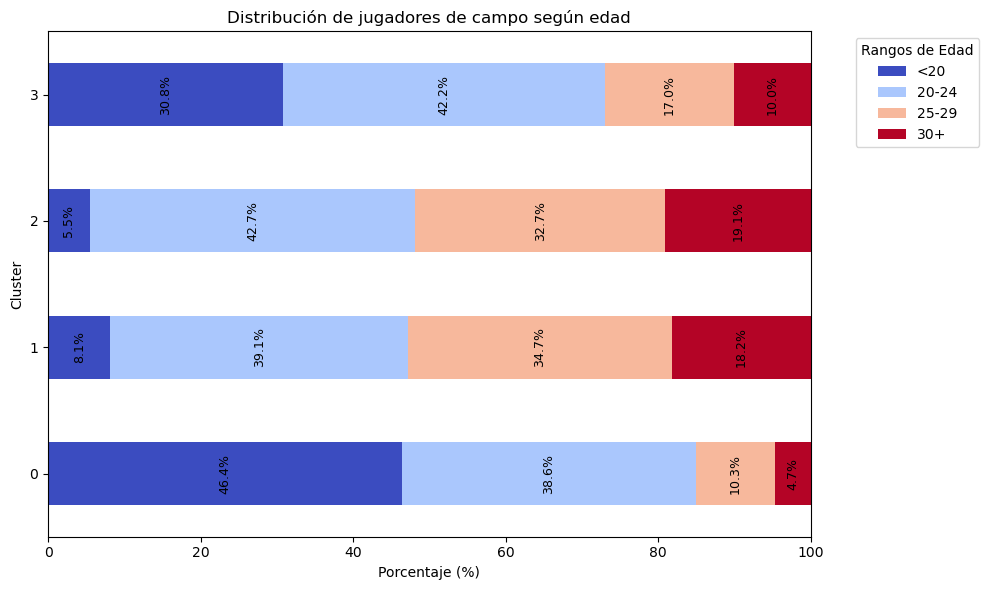

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\3259719746.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los rangos de edad
bins = [0, 20, 25, 30, float('inf')]
labels = ['<20', '20-24', '25-29', '30+']

# Crear columna con rangos de edad
df_field_players['age_group'] = pd.cut(df_field_players['age'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia normalizada (porcentaje)
contingency_table = pd.crosstab(df_field_players['Cluster_k4'], df_field_players['age_group'], normalize='index') * 100

# Graficar
ax = contingency_table.plot(kind='barh', stacked=True, figsize=(10,6), colormap='coolwarm')

# Etiquetas dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for age_group, percentage in values.items():
        if percentage > 0:
            ax.text(cumulative + percentage/2, i, f'{percentage:.1f}%', ha='center', va='center', fontsize=9, rotation='vertical', color='black')
        cumulative += percentage

# Etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Cluster')
plt.title('Distribución de jugadores de campo según edad')
plt.xlim(0, 100)

# Leyenda
plt.legend(title='Rangos de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Eliminar columna auxiliar después de graficar
df_field_players.drop('age_group', axis=1, inplace=True)


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2019042528.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



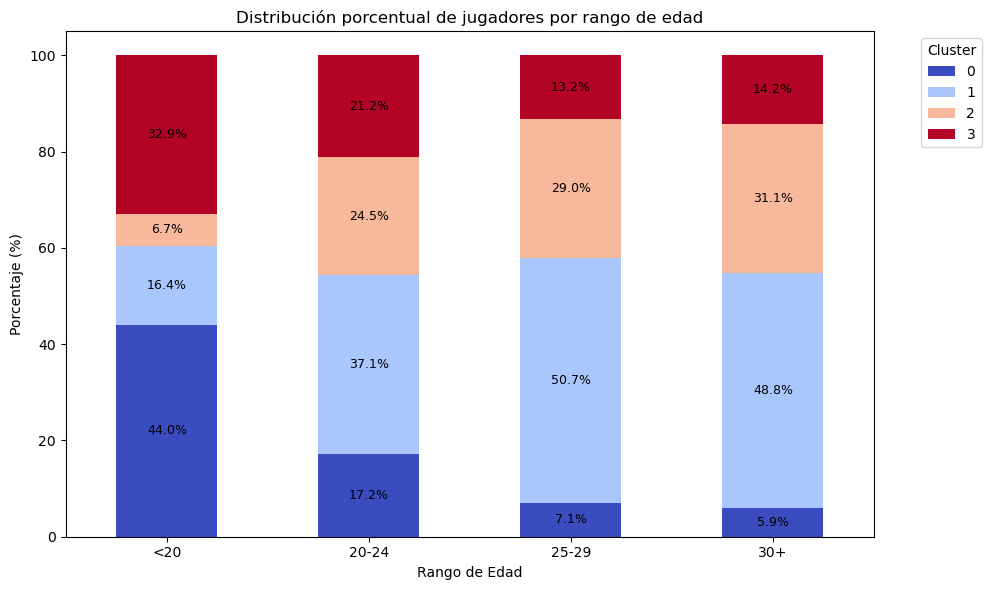

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2019042528.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir rangos de edad
bins = [0, 20, 25, 30, float('inf')]
labels = ['<20', '20-24', '25-29', '30+']

# Crear columna auxiliar de rangos de edad
df_field_players['age_group'] = pd.cut(df_field_players['age'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia y normalizar por rango de edad
contingency_table = pd.crosstab(df_field_players['age_group'], df_field_players['Cluster_k4'], normalize='index') * 100

# Graficar
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Añadir etiquetas de porcentaje
for i, (age_group, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for percentage in values:
        if percentage > 5:  # Mostrar etiqueta solo si es significativa para evitar superposición
            ax.text(i, cumulative + percentage/2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=9)
        cumulative += percentage

# Personalizar gráfica
plt.ylabel('Porcentaje (%)')
plt.xlabel('Rango de Edad')
plt.title('Distribución porcentual de jugadores por rango de edad')
plt.xticks(rotation=0)

# Leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_field_players.drop('age_group', axis=1, inplace=True)


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\793736692.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



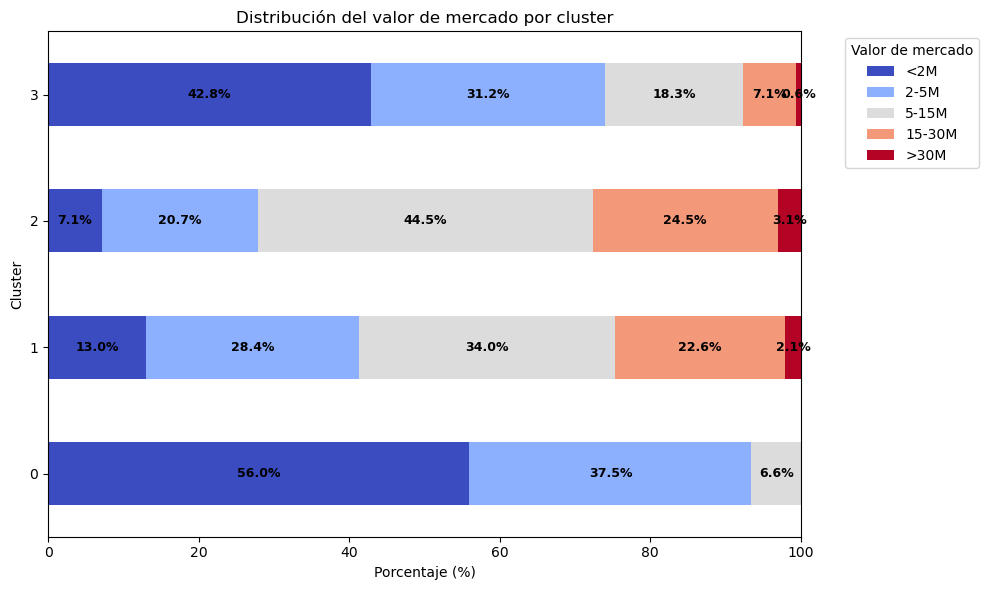

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\793736692.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir rangos del valor de mercado
bins = [0, 2_000_000, 5_000_000, 15_000_000, 30_000_000, float('inf')]
labels = ['<2M', '2-5M', '5-15M', '15-30M', '>30M']

# Crear columna con rangos del valor de mercado
df_field_players['value_group'] = pd.cut(df_field_players['value'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia normalizada
contingency_table = pd.crosstab(df_field_players['Cluster_k4'], df_field_players['value_group'], normalize='index') * 100

# Graficar
# CAMBIO CLAVE AQUÍ: de 'bar' a 'barh'
ax = contingency_table.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Añadir porcentajes a cada segmento
# Este bucle también necesita un pequeño ajuste para las barras horizontales
for i, cluster in enumerate(contingency_table.index):
    cumulative_percentage = 0
    # Asegurarse de que el orden de las columnas coincida con el orden de las etiquetas para los porcentajes
    for value_group_label in labels: # Usar el orden de las labels para asegurar consistencia
        percentage = contingency_table.loc[cluster, value_group_label] # Obtener el porcentaje
        if percentage > 0:
            # Para barras horizontales: x es la posición del texto, y es el índice de la barra
            ax.text(cumulative_percentage + percentage / 2, i, f'{percentage:.1f}%',
                            ha='center', va='center', fontsize=9, color='black', fontweight='bold')
        cumulative_percentage += percentage

# Etiquetas y título
plt.xlabel('Porcentaje (%)') # El eje X ahora es el porcentaje
plt.ylabel('Cluster')       # El eje Y ahora son los clusters
plt.title('Distribución del valor de mercado por cluster')
plt.xlim(0, 100) # El límite del eje X es de 0 a 100
plt.legend(title='Valor de mercado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Eliminar columna temporal
df_field_players.drop('value_group', axis=1, inplace=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2871616181.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



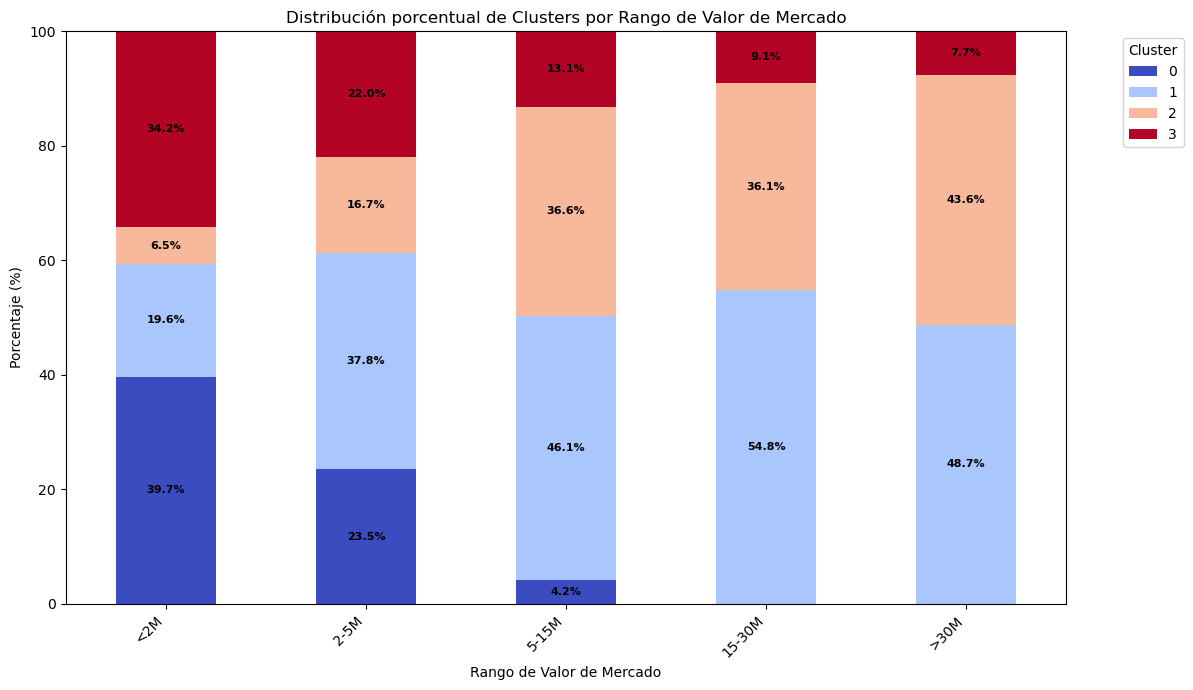

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2871616181.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_field_players ya está definido y tiene las columnas 'value' y 'Cluster_k4'

# Definir rangos del valor de mercado
bins_value = [0, 2_000_000, 5_000_000, 15_000_000, 30_000_000, float('inf')]
labels_value = ['<2M', '2-5M', '5-15M', '15-30M', '>30M']

# Crear columna con rangos de valor de mercado
df_field_players['value_group'] = pd.cut(df_field_players['value'], bins=bins_value, labels=labels_value, right=False)

# Crear tabla de contingencia normalizada por COLUMNA (normalize='columns')
# Ahora queremos saber, para cada rango de valor de mercado, qué porcentaje de jugadores cae en cada cluster.
contingency_value = pd.crosstab(df_field_players['value_group'], df_field_players['Cluster_k4'], normalize='index') * 100

# Graficar barras VERTICALES (kind='bar')
# El índice de contingency_value son los value_group (eje X) y las columnas son los clusters (colores)
ax = contingency_value.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm') # Colormap cambiado para variar un poco

# Añadir porcentajes en cada barra
# Iterar sobre las columnas (que son los clusters) y luego sobre los rangos de valor
for i, (value_group_label, percentages_by_cluster) in enumerate(contingency_value.iterrows()):
    cumulative_percentage = 0
    # Asegurarse de que el orden de los clusters coincida con el orden en la leyenda
    for cluster_id in sorted(contingency_value.columns): # Ordenar por cluster_id para consistencia
        percentage = percentages_by_cluster.get(cluster_id, 0)
        if percentage > 0:
            # Para barras verticales: x es el índice de la barra, y es la posición del texto
            ax.text(i, cumulative_percentage + percentage / 2, f'{percentage:.1f}%',
                            ha='center', va='center', fontsize=8, color='black', fontweight='bold')
        cumulative_percentage += percentage

# Etiquetas y título
plt.xlabel('Rango de Valor de Mercado') # Eje X ahora son los rangos de valor
plt.ylabel('Porcentaje (%)')           # Eje Y ahora es el porcentaje
plt.title('Distribución porcentual de Clusters por Rango de Valor de Mercado')
plt.ylim(0, 100) # El límite del eje Y es de 0 a 100
# La leyenda ahora debe mostrar los Clusters
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X para mayor legibilidad
plt.tight_layout()
plt.show()

# Eliminar columna temporal
df_field_players.drop('value_group', axis=1, inplace=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2799378875.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



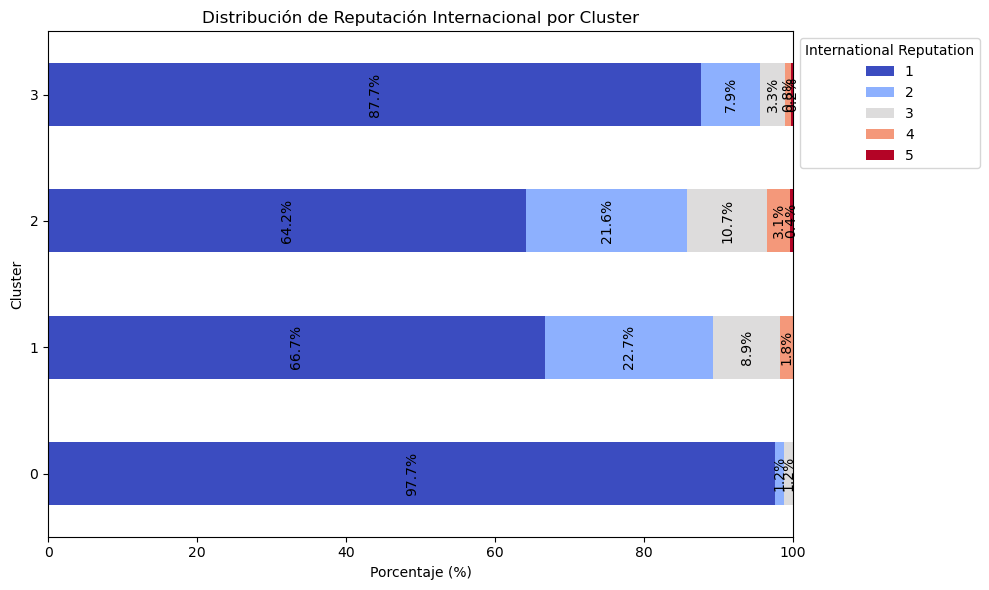

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna sea categórica con orden
df_field_players['international_reputation'] = pd.Categorical(
    df_field_players['international_reputation'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
)

# Crear tabla de contingencia (porcentaje por cluster)
contingency_table = pd.crosstab(
    df_field_players['Cluster_k4'],
    df_field_players['international_reputation'],
    normalize='index'
) * 100

# Crear el gráfico (horizontal)
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (en vertical)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for rep_level, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,  # x-position
                i,                            # y-position
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90  # Vertical
            )
        cumulative += percentage

# Etiquetas y título
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución de Reputación Internacional por Cluster')
ax.set_xlim(0, 100)

# Leyenda
plt.legend(title='International Reputation', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\1763697785.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



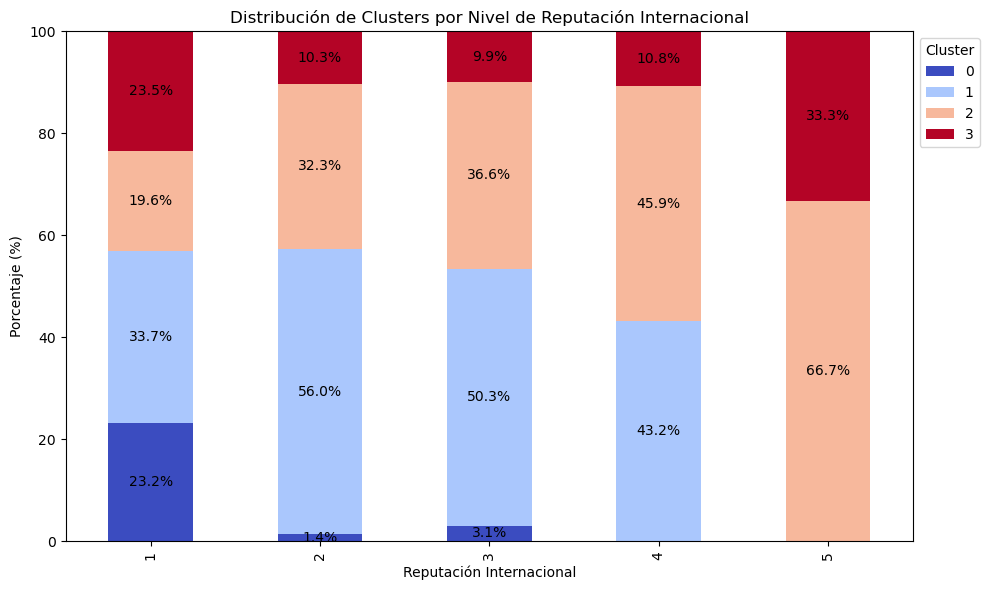

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna sea categórica y ordenada
df_field_players['international_reputation'] = pd.Categorical(
    df_field_players['international_reputation'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
)

# Crear tabla de contingencia y normalizar por reputación (cada barra = reputación, suma 100%)
contingency_table = pd.crosstab(
    df_field_players['international_reputation'],
    df_field_players['Cluster_k4'],
    normalize='index'
) * 100

# Crear el gráfico (barras verticales, eje X = reputación, colores = clusters)
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras
for i, rep_level in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[rep_level, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
        cumulative += percentage

# Etiquetas y título
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Reputación Internacional')
ax.set_title('Distribución de Clusters por Nivel de Reputación Internacional')
ax.set_ylim(0, 100)

# Leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2298870420.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



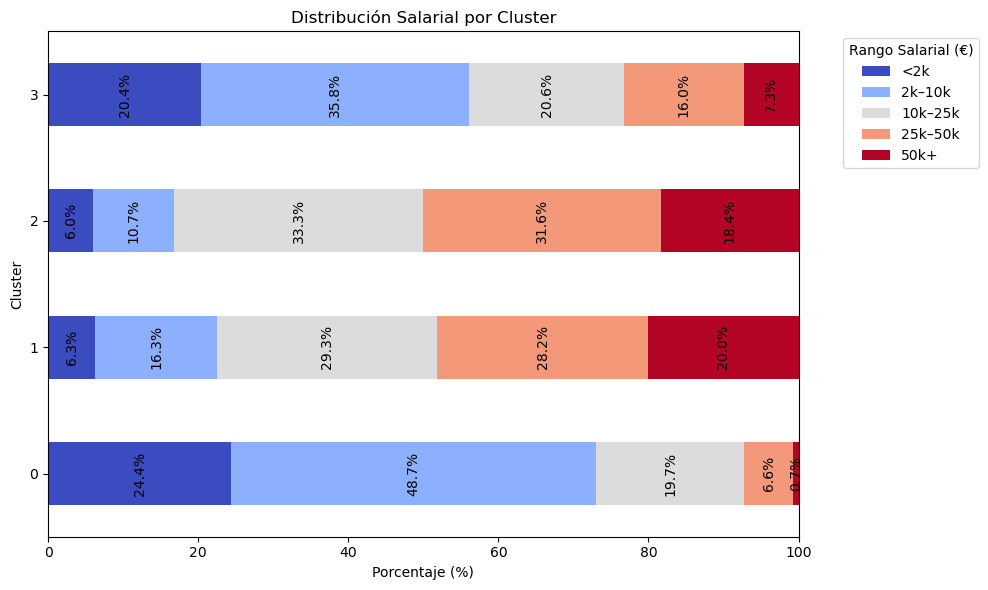

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\2298870420.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna de rangos salariales
bins = [0, 2000, 10000, 25000, 50000, float('inf')]
labels = ['<2k', '2k–10k', '10k–25k', '25k–50k', '50k+']

df_field_players['wage_group'] = pd.cut(df_field_players['wage'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia (normalizada por cluster)
contingency_table = pd.crosstab(
    df_field_players['Cluster_k4'],
    df_field_players['wage_group'],
    normalize='index'
) * 100

# Gráfico apilado horizontal
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas de porcentaje dentro de las barras
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for wage_range, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,  # posición x
                i,                            # posición y
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90
            )
        cumulative += percentage

# Etiquetas y leyenda
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución Salarial por Cluster')
ax.set_xlim(0, 100)
plt.legend(title='Rango Salarial (€)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_field_players.drop('wage_group', axis=1, inplace=True)


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\1814510641.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



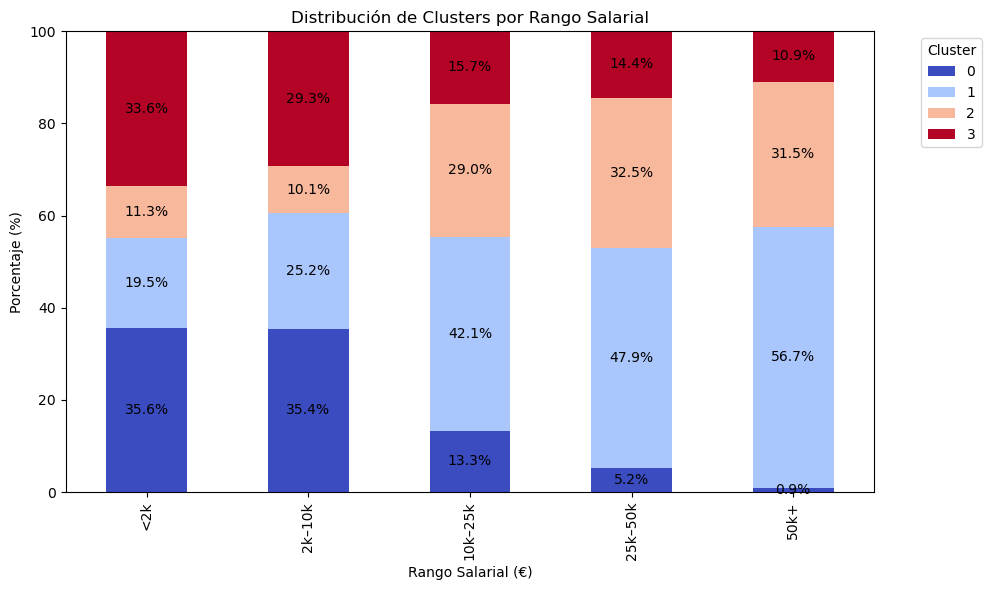

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\1814510641.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna de rangos salariales
bins = [0, 2000, 10000, 25000, 50000, float('inf')]
labels = ['<2k', '2k–10k', '10k–25k', '25k–50k', '50k+']

df_field_players['wage_group'] = pd.cut(df_field_players['wage'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia y normalizar por grupo salarial (cada barra suma 100%)
contingency_table = pd.crosstab(
    df_field_players['wage_group'],
    df_field_players['Cluster_k4'],
    normalize='index'
) * 100

# Gráfico de barras verticales: eje X = rango salarial, colores = clusters
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas de porcentaje dentro de las barras
for i, wage_group in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[wage_group, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
        cumulative += percentage

# Etiquetas y leyenda
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Rango Salarial (€)')
ax.set_title('Distribución de Clusters por Rango Salarial')
ax.set_ylim(0, 100)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_field_players.drop('wage_group', axis=1, inplace=True)


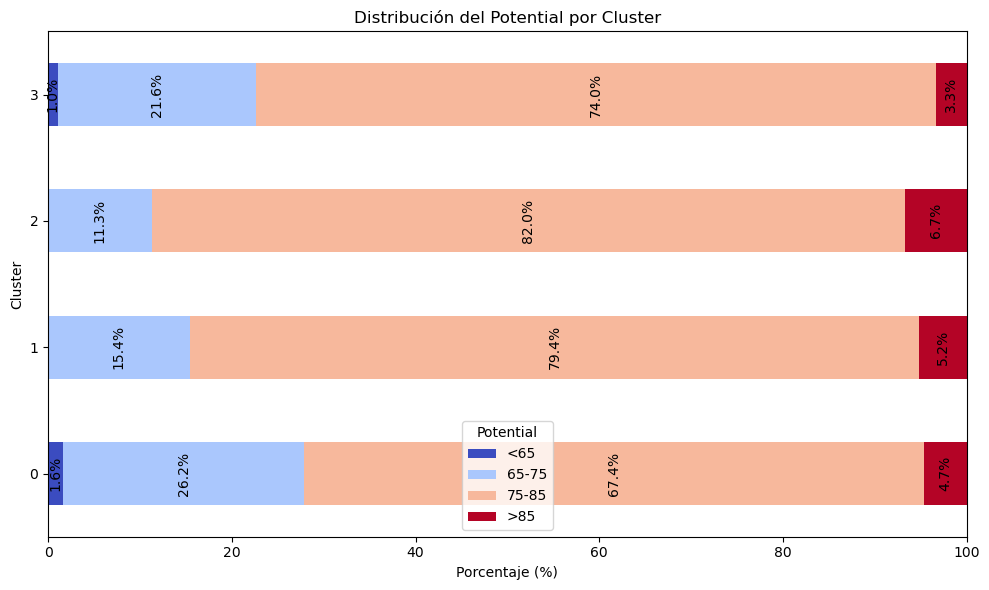

In [132]:
# Definir los rangos de potential
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear los grupos de potential directamente
potential_groups = pd.cut(df_field_players['potential'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por cluster
contingency_table = pd.crosstab(df_field_players['Cluster_k4'], potential_groups, normalize='index') * 100

# Graficar la tabla de contingencia
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas dentro de las barras (en vertical)
for i, (cluster, values) in enumerate(contingency_table.iterrows()):
    cumulative = 0
    for pot_range, percentage in values.items():
        if percentage > 0:
            ax.text(
                cumulative + percentage / 2,
                i,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                rotation=90  # Mostrar los porcentajes en vertical
            )
        cumulative += percentage

# Etiquetas y formato
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Cluster')
ax.set_title('Distribución del Potential por Cluster')
ax.set_xlim(0, 100)
plt.legend(title='Potential')

# Mostrar
plt.tight_layout()
plt.show()


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\4004441537.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



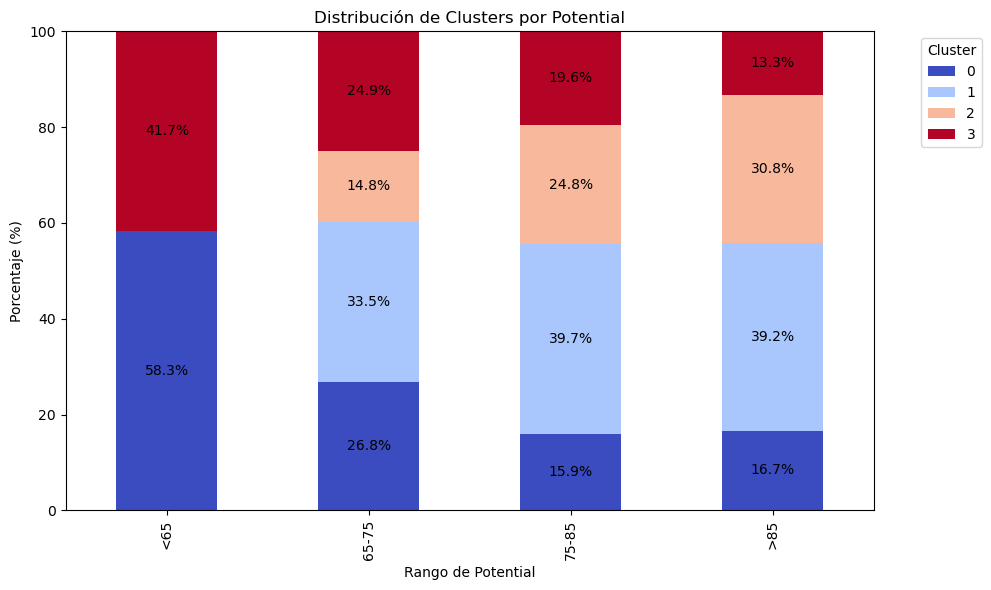

C:\Users\javie\AppData\Local\Temp\ipykernel_14488\4004441537.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los rangos de potential
bins = [0, 64, 75, 85, float('inf')]
labels = ['<65', '65-75', '75-85', '>85']

# Crear grupos de potential
df_field_players['potential_group'] = pd.cut(df_field_players['potential'], bins=bins, labels=labels, right=False)

# Crear la tabla de contingencia y normalizar por grupo de potential
contingency_table = pd.crosstab(df_field_players['potential_group'], df_field_players['Cluster_k4'], normalize='index') * 100

# Gráfico de barras verticales: eje X = potential group, colores = clusters
fig, ax = plt.subplots(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Añadir etiquetas de porcentaje dentro de las barras
for i, pot_group in enumerate(contingency_table.index):
    cumulative = 0
    for cluster in contingency_table.columns:
        percentage = contingency_table.loc[pot_group, cluster]
        if percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )
        cumulative += percentage

# Etiquetas y formato
ax.set_ylabel('Porcentaje (%)')
ax.set_xlabel('Rango de Potential')
ax.set_title('Distribución de Clusters por Potential')
ax.set_ylim(0, 100)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar
plt.tight_layout()
plt.show()

# Eliminar columna auxiliar
df_field_players.drop('potential_group', axis=1, inplace=True)


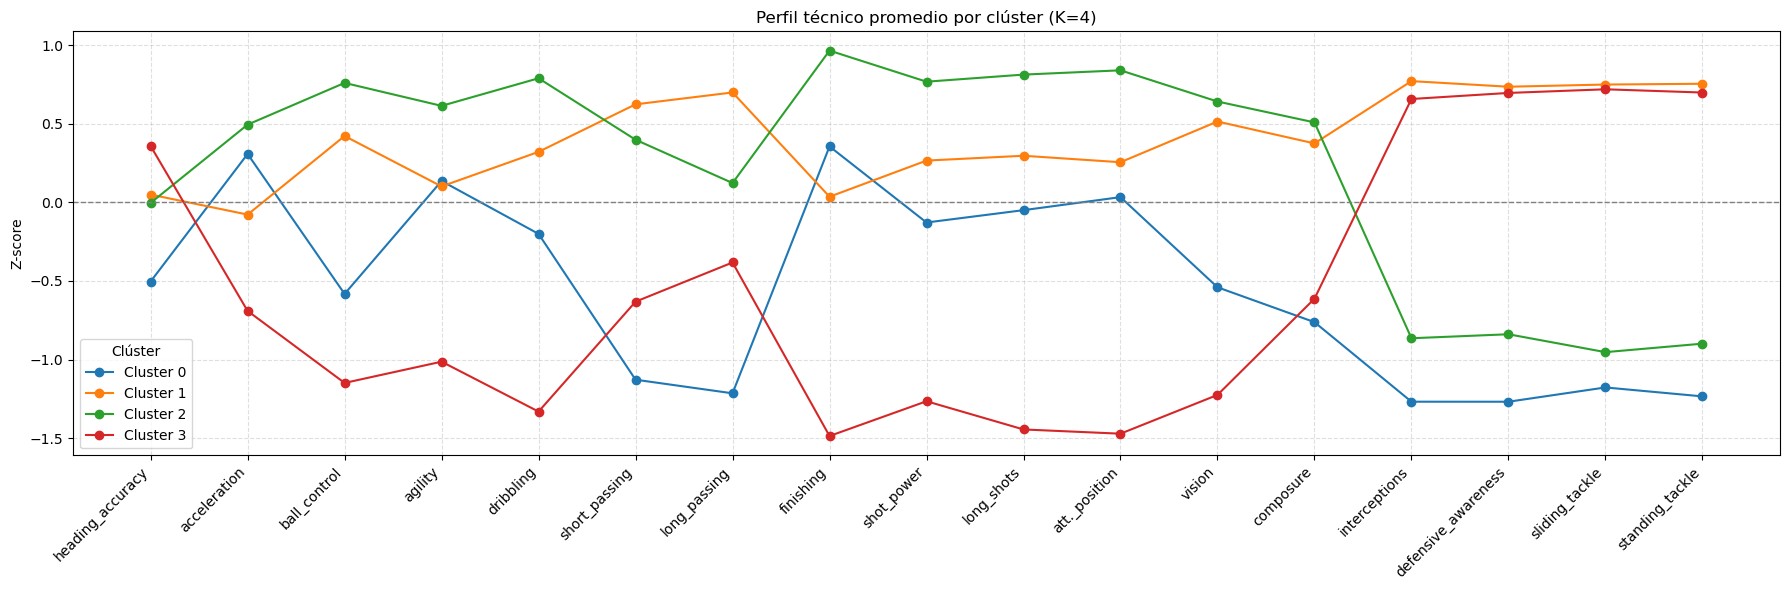

In [134]:
import matplotlib.pyplot as plt

# Establecer el tamaño de la figura
plt.figure(figsize=(18, 6))

# Trazar cada uno de los 4 clusters
for i in range(centroids_df.shape[0]):
    plt.plot(
        centroids_df.columns,
        centroids_df.iloc[i],
        label=f"Cluster {i}",
        marker='o'
    )

# Estética del gráfico
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.ylabel("Z‑score")
plt.title("Perfil técnico promedio por clúster (K=4)")
plt.legend(title="Clúster")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Mostrar
plt.show()


In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib

# 1. Extraer variables técnicas de porteros
features_gk = ["gk_diving", "gk_handling", "gk_kicking", "gk_positioning", "gk_reflexes"]
X_gk = df_goalkeepers_only[features_gk].copy()

# 2. Escalado
scaler_gk = StandardScaler()
X_gk_scaled = scaler_gk.fit_transform(X_gk)

# 3. PCA
pca_gk = PCA(n_components=2)
X_gk_pca = pca_gk.fit_transform(X_gk_scaled)

# 4. KMeans
kmeans_gk = KMeans(n_clusters=3, random_state=42, n_init=10)
df_goalkeepers_only["Cluster_k3_interface"] = kmeans_gk.fit_predict(X_gk_pca)

# 5. Guardar los objetos para usar en Gradio
joblib.dump(scaler_gk, "scaler_gk.pkl")
joblib.dump(pca_gk, "pca_gk.pkl")
joblib.dump(kmeans_gk, "kmeans_gk.pkl")


['kmeans_gk.pkl']

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Variables para jugadores de campo
features_field = [
    "heading_accuracy", "acceleration", "ball_control", "agility", "dribbling",
    "short_passing", "long_passing", "finishing", "shot_power", "long_shots",
    "att._position", "vision", "composure", "interceptions",
    "defensive_awareness", "sliding_tackle", "standing_tackle"
]

# Extraer las variables del DataFrame
X_field = df_field_players[features_field].copy()

# Escalar los datos
scaler_field = StandardScaler()
X_field_scaled = scaler_field.fit_transform(X_field)

# Entrenar KMeans (si no lo habías hecho)
kmeans_field = KMeans(n_clusters=4, random_state=42, n_init=10)
df_field_players["Cluster_k4_interface"] = kmeans_field.fit_predict(X_field_scaled)

# Guardar los modelos
joblib.dump(scaler_field, "scaler_field.pkl")
joblib.dump(kmeans_field, "kmeans_field.pkl")


C:\Users\javie\AppData\Local\Temp\ipykernel_14488\809408785.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['kmeans_field.pkl']

In [142]:
import gradio as gr
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar modelos entrenados
scaler_gk = joblib.load("scaler_gk.pkl")
pca_gk = joblib.load("pca_gk.pkl")
kmeans_gk = joblib.load("kmeans_gk.pkl")
scaler_field = joblib.load("scaler_field.pkl")
kmeans_field = joblib.load("kmeans_field.pkl")

# Asume que df_goalkeepers_only y df_field_players ya están definidos en memoria

# Variables
features_gk = ["gk_diving", "gk_handling", "gk_kicking", "gk_positioning", "gk_reflexes"]
features_field = [
    "heading_accuracy", "acceleration", "ball_control", "agility", "dribbling",
    "short_passing", "long_passing", "finishing", "shot_power", "long_shots",
    "att._position", "vision", "composure", "interceptions",
    "defensive_awareness", "sliding_tackle", "standing_tackle"
]

# Etiquetas traducidas
labels_gk = {
    "gk_diving": "Estirada (gk_diving)",
    "gk_handling": "Blocaje (gk_handling)",
    "gk_kicking": "Despeje (gk_kicking)",
    "gk_positioning": "Colocación (gk_positioning)",
    "gk_reflexes": "Reflejos (gk_reflexes)"
}
labels_field = {
    "heading_accuracy": "Precisión de cabeza (heading_accuracy)",
    "acceleration": "Aceleración (acceleration)",
    "ball_control": "Control de balón (ball_control)",
    "agility": "Agilidad (agility)",
    "dribbling": "Regate (dribbling)",
    "short_passing": "Pase corto (short_passing)",
    "long_passing": "Pase largo (long_passing)",
    "finishing": "Finalización (finishing)",
    "shot_power": "Potencia de tiro (shot_power)",
    "long_shots": "Tiros lejanos (long_shots)",
    "att._position": "Colocación ofensiva (att._position)",
    "vision": "Visión (vision)",
    "composure": "Capacidad para la toma de decisiones (composure)",
    "interceptions": "Intercepciones (interceptions)",
    "defensive_awareness": "Capacidad defensiva (defensive_awareness)",
    "sliding_tackle": "Entrada deslizante (sliding_tackle)",
    "standing_tackle": "Entrada sin deslizarse (standing_tackle)"
}

# Descripciones
descripciones_gk = {
    0: "🔐 Cluster 0: Porteros fiables...",
    1: "🧤 Cluster 1: Porteros con limitaciones...",
    2: "🥇 Cluster 2: Porteros de élite..."
}
descripciones_field = {
    0: "⚡ Cluster 0: Atacantes verticales...",
    1: "🔄 Cluster 1: Jugadores polivalentes...",
    2: "🎯 Cluster 2: Ofensivos experimentados...",
    3: "🛡️ Cluster 3: Especialistas defensivos..."
}

# Predicción
def predecir_cluster(posicion, *args):
    if posicion == "Portero":
        datos = np.array(args[:len(features_gk)]).reshape(1, -1)
        datos_escalados = scaler_gk.transform(datos)
        datos_pca = pca_gk.transform(datos_escalados)
        cluster = kmeans_gk.predict(datos_pca)[0]
        return f"🔐 El jugador pertenece al Cluster {cluster}", descripciones_gk[cluster]
    else:
        datos = np.array(args[len(features_gk):]).reshape(1, -1)
        datos_escalados = scaler_field.transform(datos)
        cluster = kmeans_field.predict(datos_escalados)[0]
        return f"⚽ El jugador pertenece al Cluster {cluster}", descripciones_field[cluster]

# Visualización KMeans
def clustering_dinamico(tipo, k):
    if tipo == "Portero":
        df = df_goalkeepers_only.dropna(subset=features_gk)
        X = StandardScaler().fit_transform(df[features_gk])
    else:
        df = df_field_players.dropna(subset=features_field)
        X = StandardScaler().fit_transform(df[features_field])

    X_pca = PCA(n_components=2).fit_transform(X)
    etiquetas = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_pca)

    fig, ax = plt.subplots()
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='tab10', edgecolors='k')
    ax.set_title(f"K-Means con k={k}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    return fig

# Interfaz Gradio
def construir_interfaz():
    with gr.Blocks() as demo:
        with gr.Tab("🔍 Predicción"):
            gr.Markdown("## Predicción de Clúster para Futbolistas")

            posicion = gr.Radio(["Portero", "Jugador de campo"], label="Posición")
            inputs_gk = [gr.Number(label=labels_gk[var], visible=True) for var in features_gk]
            inputs_field = [gr.Number(label=labels_field[var], visible=False) for var in features_field]
            resultado = gr.Textbox(label="Cluster asignado")
            descripcion = gr.Markdown()

            def actualizar(pos):
                visibles_gk = pos == "Portero"
                visibles_field = pos != "Portero"
                updates = [gr.update(visible=visibles_gk)] * len(inputs_gk) + [gr.update(visible=visibles_field)] * len(inputs_field)
                return updates

            posicion.change(fn=actualizar, inputs=[posicion], outputs=inputs_gk + inputs_field)

            boton = gr.Button("Predecir Cluster")
            boton.click(fn=predecir_cluster, inputs=[posicion] + inputs_gk + inputs_field, outputs=[resultado, descripcion])

        with gr.Tab("📊 Visualización K-Means"):
            gr.Markdown("## Ejecución de K-Means y visualización de resultados")
            tipo = gr.Radio(["Portero", "Jugador de campo"], label="Tipo de jugador")
            k = gr.Slider(minimum=2, maximum=10, value=3, step=1, label="Número de clusters (K)")
            boton_cluster = gr.Button("Generar Clustering")
            salida = gr.Plot()
            boton_cluster.click(fn=clustering_dinamico, inputs=[tipo, k], outputs=salida)

    return demo

demo = construir_interfaz()
demo.launch()


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.
